# LDA Output Analysis: Plotting Demos

This notebook provides a demonstration of how the various functions contained in the func folder can be used to analyze Gensim LDA model output.

**Tip** Type  *? function name* to see documentation for a given function

## Imports and Data Loading

In [9]:
from gensim.models.ldamodel import LdaModel
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from imp import reload

The following requires this notebook to be in the scripts folder

In [10]:
#NAVIGATE TO SCRIPTS FOLDER TO GET FILEPATHS.PY
#Will all be correct except absolute_path because demos folder is nested at same level as scripts folder

filepaths_path = os.path.join(os.path.dirname(os.path.abspath("")),"scripts\\filepaths")
sys.path.insert(0,os.path.dirname(filepaths_path))
from filepaths import code_path

from filepaths import socio_data_path 
from filepaths import socio_models_path 
from filepaths import socio_models_matrix_path 

from filepaths import demog_data_path 
from filepaths import demog_models_path 
from filepaths import demog_models_matrix_path 


sys.path.insert(0,code_path)
import AbstractCleaner
import LdaOutput
import LdaOutputPerTopicMetrics
import LdaOutputDocs
import LdaOutputWordPlots
import LdaOutputTopicSimilarity
import LdaOutputTopicSizePlots
import LdaOutputTimePlots
import LdaOutputGroupPlots


Data

In [11]:
demog_TM_data = pd.read_csv(os.path.join(demog_data_path, "Demog_data_final.csv"))#, index_col = 0)
socio_TM_data= pd.read_csv(os.path.join(socio_data_path, "Socio_data_final.csv"))#, index_col = 0)

socio_journals = socio_TM_data["prism:publicationName"].copy() #need this below
socio_year_labels = socio_TM_data.Year
demog_year_labels = demog_TM_data.Year

Corpus, Dictionary, Cleaned Abstracts

In [12]:
#demography
filepath = os.path.join(demog_data_path, "Demog_abstracts4_FreqFilter.pickle")
with open(filepath, "rb") as fp:   #Unpickling
    demog_cleaned_docs = pickle.load(fp)
print(len(AbstractCleaner.extract_vocab(demog_cleaned_docs)), "words in vocab")
print(AbstractCleaner.corpus_length(demog_cleaned_docs), "words in corpus")
demog_corpus, demog_dictionary = AbstractCleaner.get_corpus_and_dictionary(demog_cleaned_docs)

print("\n")

#sociology
filepath = os.path.join(socio_data_path, "Socio_abstracts4_FreqFilter.pickle")
with open(filepath, "rb") as fp:   #Unpickling
    socio_cleaned_docs = pickle.load(fp)
print(len(AbstractCleaner.extract_vocab(socio_cleaned_docs)), "words in vocab")
print(AbstractCleaner.corpus_length(socio_cleaned_docs), "words in corpus")
socio_corpus, socio_dictionary = AbstractCleaner.get_corpus_and_dictionary(socio_cleaned_docs)

3257 words in vocab
247319 words in corpus


3812 words in vocab
232271 words in corpus


Demog models and $\Theta$ matrices generated using LdaOutput.get_document_matrices()

In [13]:
Kvals = [5, 10, 15, 20, 25, 30 ,35, 40, 50, 60]

fnames = ["Best_%d_model"%k for k in Kvals]

demog_model_dict = {}
for i,k in enumerate(Kvals):
    demog_model_dict[k] = LdaModel.load(os.path.join(demog_models_path,fnames[i]))
    
fnames = ["theta_matrix_" + str(k) + ".npy" for k in Kvals]
demog_theta_dict = {}
for i, k in enumerate(Kvals):
    demog_theta_dict[k] = np.load(os.path.join(demog_models_matrix_path, fnames[i]))

Socio Models and $\Theta$ matrices generated using LdaOutput.get_document_matrices()

In [14]:
Kvals = [5, 10, 15, 20, 25, 30 ,35, 40, 45]

fnames = ["Best_%d_model"%k for k in Kvals]
socio_model_dict = {}
for i,k in enumerate(Kvals):
    socio_model_dict[k] = LdaModel.load(os.path.join(socio_models_path,fnames[i]))
    
    
fnames = ["theta_matrix_" + str(k) + ".npy" for k in Kvals]
socio_theta_dict = {}
for i, k in enumerate(Kvals):
    socio_theta_dict[k] = np.load(os.path.join(socio_models_matrix_path, fnames[i]))

Load Per-document word-topic matrices, also generated by LdaOutput.get_document_matrices()
These take a bit to load so I only load the ones for the 20-topic models here

In [15]:
vals = [20]
fnames = ["wordtopic_arrays_%d.npz"%k for k in vals]
demog_wordtopic_dict = {}
for i, k in enumerate(vals):
    demog_wordtopic_dict[k] = LdaOutput.load_wordtopic_array(filename = fnames[i], path = demog_models_matrix_path)

In [16]:
vals = [20]
fnames = ["wordtopic_arrays_%d.npz"%k for k in vals]
socio_wordtopic_dict = {}
for i, k in enumerate(vals):
    socio_wordtopic_dict[k] = LdaOutput.load_wordtopic_array(filename = fnames[i], path = socio_models_matrix_path)

# Per-Topic Metrics

See LdaOutputPerTopicMetrics.py 

Set up a list of models to compare and a list of labels for each model

In [17]:
Kvals = [5,10,15,20,25,30,35,40,50,60]
model_list = [demog_model_dict[k] for k in Kvals]

Set parameters for kl and coherence metrics

In [18]:
thresh = 0.01
topn_phf = 25
topn_coherence = 10

Visualize a single metric. Here you have control over the coloring

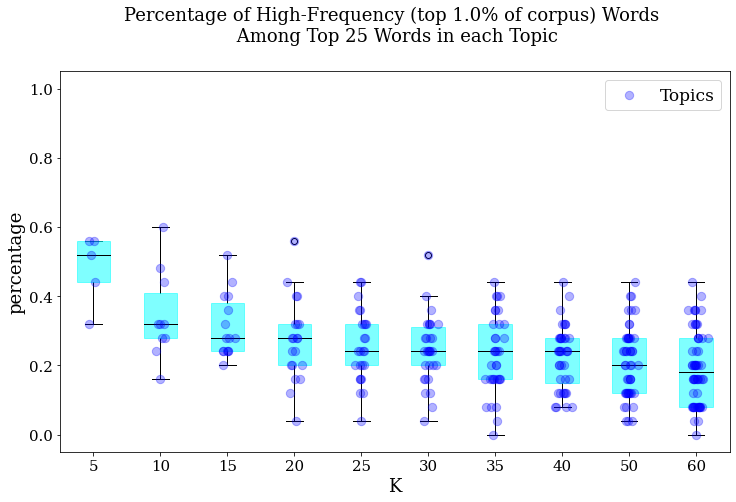

In [19]:
metric = "phf"
model_summaries = LdaOutput.topic_summarizer(model_list = model_list,
                                             metric = metric,
                                             topn_phf = topn_phf,
                                             thresh = thresh,
                                             corpus = demog_corpus,
                                             dictionary = demog_dictionary,
                                             save_array = False)

LdaOutputPerTopicMetrics.visualize_spread(model_summaries = model_summaries, 
                           metric = metric, 
                           labels = Kvals,
                           topn_phf = topn_phf, #used for labeling
                           thresh = thresh, #used for labeling
                           xlabel = "K",
                           plot_points = True,
                           color_point = "blue",
                           color_box = "cyan",
                           alpha_point = 0.3,
                           alpha_box = 0.5,
                           save_fig = False)
                                 

Or visualize all four in a grid; coloring and placement has been pre-determined

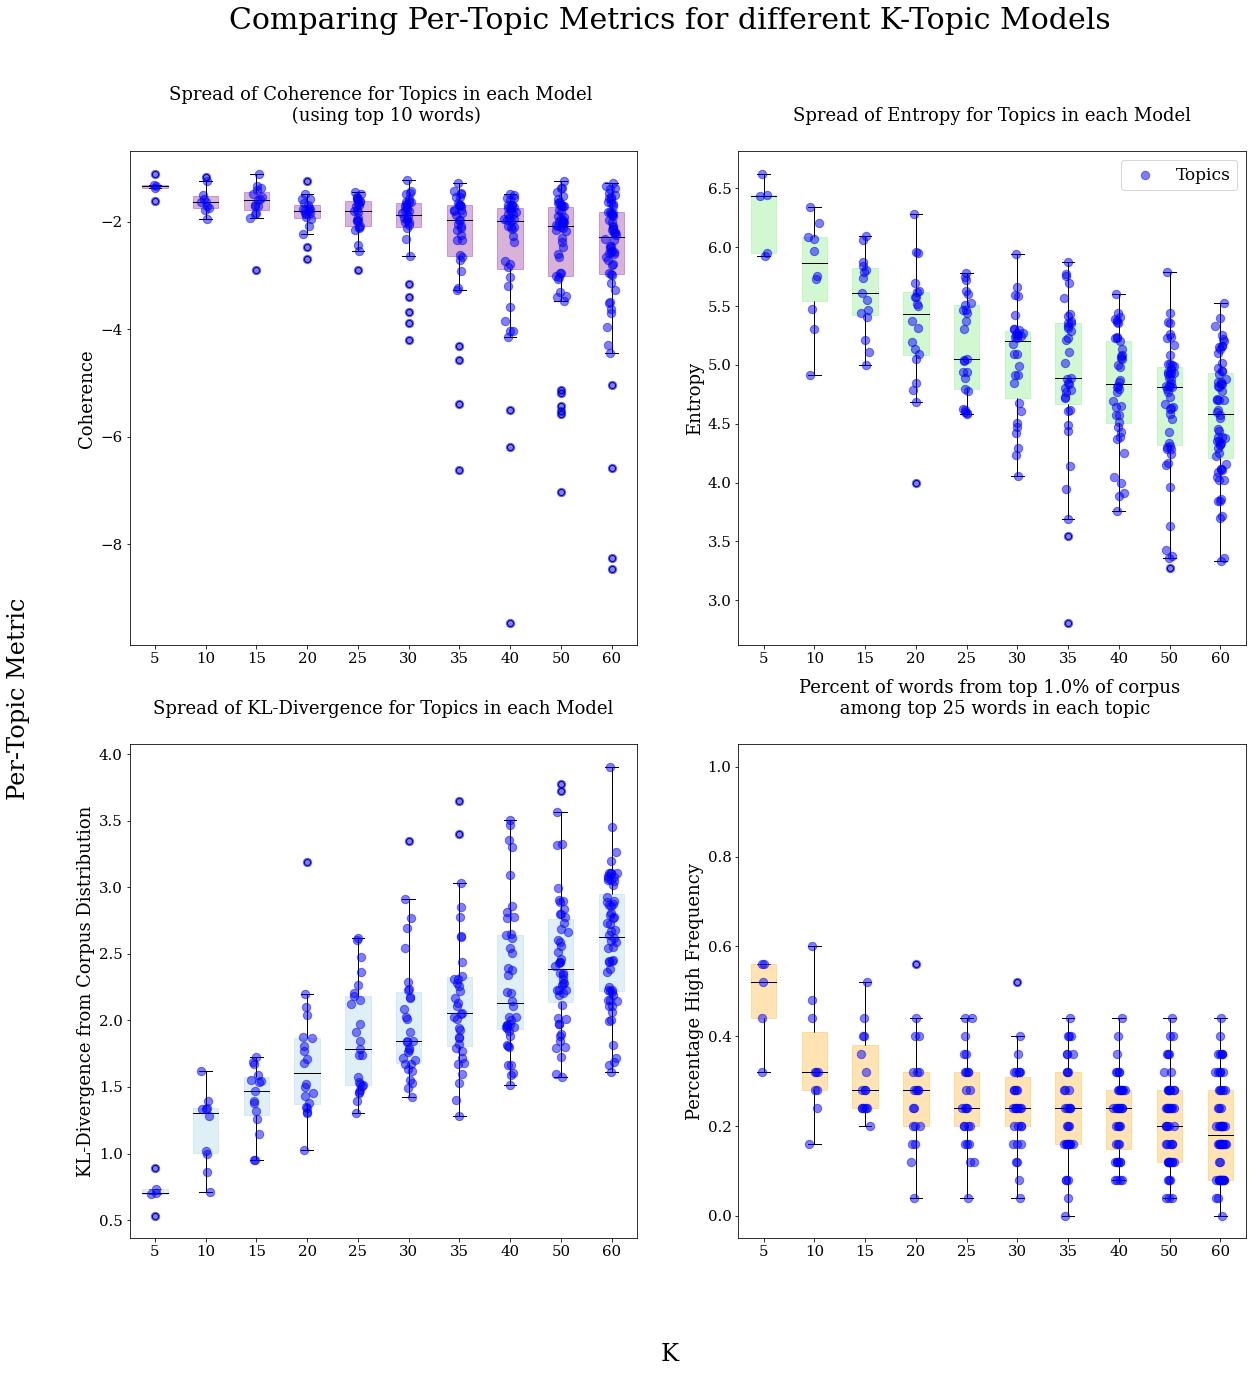

In [20]:
metric = "all"

model_summaries = LdaOutput.topic_summarizer(model_list = model_list,
                                             metric = metric,
                                             corpus = demog_corpus,
                                             dictionary = demog_dictionary,
                                             topn_coherence = topn_coherence,
                                             topn_phf = topn_phf,
                                             thresh = thresh,
                                             save_array = False)


LdaOutputPerTopicMetrics.visualize_spread(model_summaries = model_summaries, 
                           metric = metric, 
                           labels = Kvals,
                           xlabel = "K",
                           sup_title = "Comparing Per-Topic Metrics for different K-Topic Models",
                           topn_coherence = topn_coherence,
                           topn_phf = topn_phf,
                           thresh = thresh,                                                          
                           save_fig = False,
                         )

Examine relationships between per-topic metrics (can give it just one model or multiple models, in both cases should be in a list). Adding too many models starts to become unmaneagable

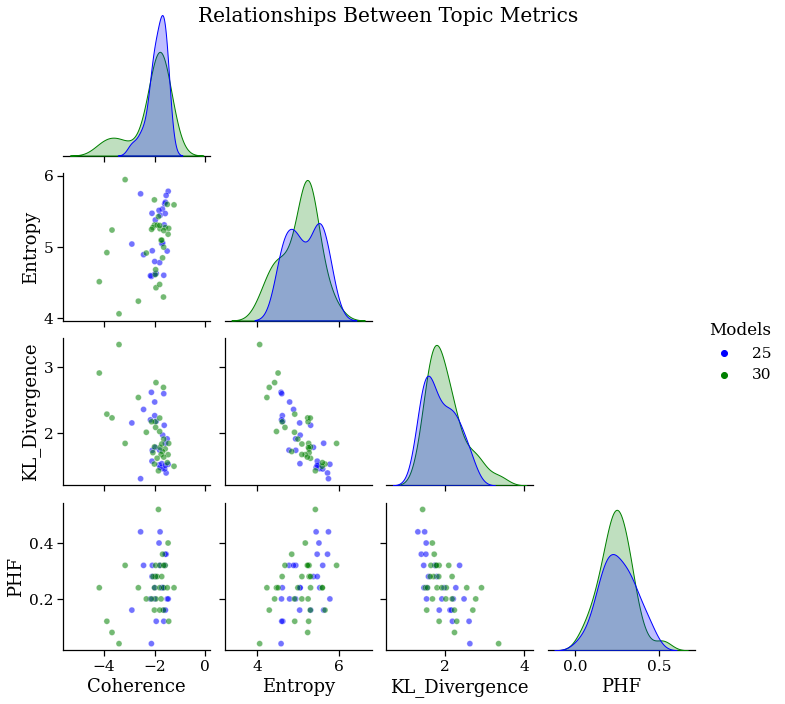

In [21]:
metric = "all"

model_subset = model_list[4:6]
labels = Kvals[4:6]

model_summaries = LdaOutput.topic_summarizer(model_list = model_subset,
                                             metric = metric,
                                             corpus = demog_corpus,
                                             dictionary = demog_dictionary,
                                             topn_coherence = topn_coherence,
                                             topn_phf = topn_phf,
                                             thresh = thresh,
                                             save_array = False)


LdaOutputPerTopicMetrics.multi_model_pairplot(model_summaries = model_summaries,
                                              labels = labels,
                                              colors = ["blue","green"],
                                              topn_coherence = topn_coherence,
                                              topn_phf = topn_phf,
                                              thresh = thresh,
                                              alpha = 0.55,
                                              save_fig = False)

plt.show()

Rank topics by a given metric in a way that can see specific topic IDs

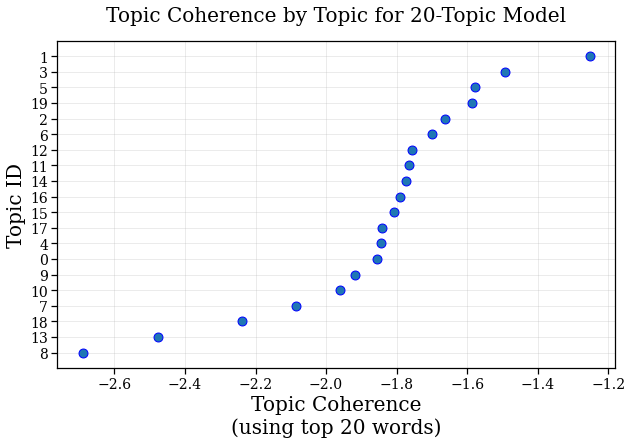

In [22]:
LdaOutputPerTopicMetrics.topic_metric_order_plot(demog_model_dict[20],
                                                 corpus = demog_corpus,
                                                 dictionary = demog_dictionary,
                                                 metric = "coherence",
                                                 topn_coherence = 20,
                                                 topn_phf = 25,
                                                 thresh = 0.1,
                                                 figsize = (10,6),
                                                 save_fig = False)
plt.show()

# Top Words

see LdaOutputWordPlots.py

Plot a barplot for a single topic 
* note this is a rapper for a function LdaOutputWordPlots.topic_word_barplot() that requires user to specify more input but also allows more finegrained control
* the function has two options for what kinds of values to plot. *counts* are unnormalized expected counts (red for words in topics and blue for overall). *probabilities* are normalized expected counts for topics (purple) and empirical corpus frequencies (green) **check**

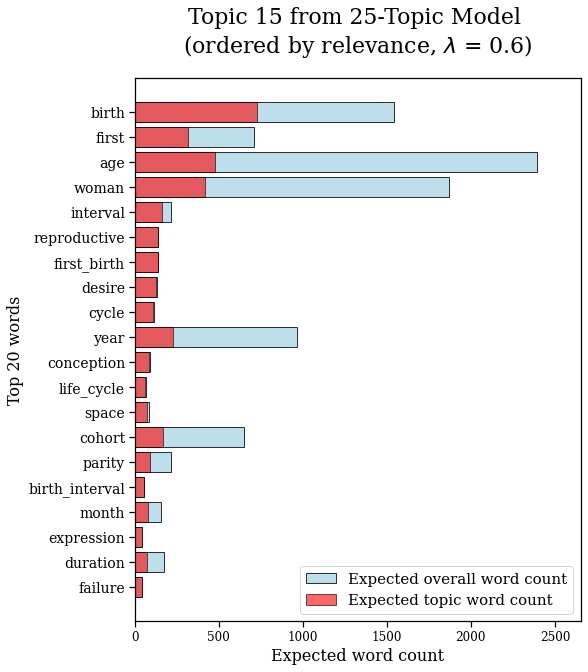

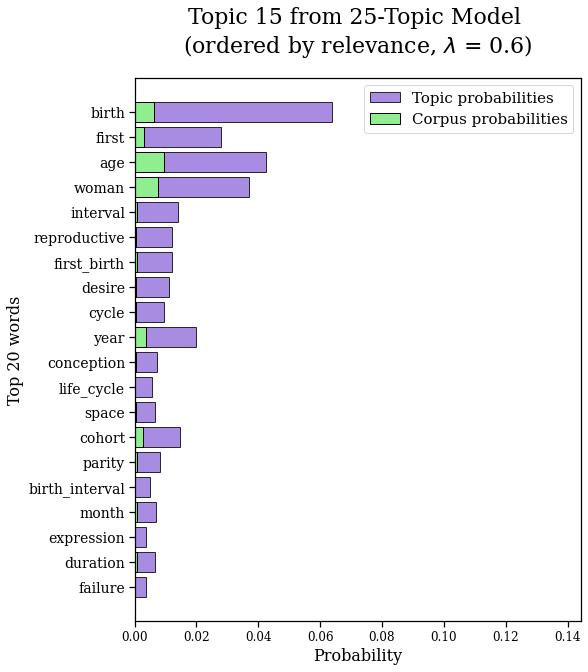

In [23]:
k = 25
LdaOutputWordPlots.topic_relevance_barplot(model = demog_model_dict[k],
                                           topicid = 15, 
                                           corpus = demog_corpus,
                                           dictionary = demog_dictionary,
                                           value_type = "counts",
                                           detect_max_x = True, #will look at all the topics to set axis limits
                                           theta_mat = None, #demog_theta_dict[k], #if not specified, will generate this
                                           lamb = .6, #affects word order - see relevance formula
                                           topn = 20,
                                           plot_title = True,
                                           plot_overall_magnitudes = True, #can turn off the overall corpus magnitudes
                                           title = None, #uses a default
                                           set_figsize = True,
                                           figsize = (8,10),
                                           save_fig = False) 

LdaOutputWordPlots.topic_relevance_barplot(model = demog_model_dict[k],
                                           topicid = 15, 
                                           corpus = demog_corpus,
                                           dictionary = demog_dictionary,
                                           value_type = "probabilities",
                                           detect_max_x = True, #will look at all the topics to set axis limits
                                           theta_mat = None, #demog_theta_dict[k], #if not specified, will generate this
                                           lamb = .6, #affects word order - see relevance formula
                                           topn = 20,
                                           plot_title = True,
                                           title = None, #uses a default
                                           plot_overall_magnitudes = True,
                                           set_figsize = True,
                                           figsize = (8,10),
                                           save_fig = False) 

Plot a grid of barplots for all topics in a model. Again the function below is a wrapper for a function LdaOutputWordPlots.topic_grid_plotter(). It handles actually getting the output while the plotter handles creating the grid

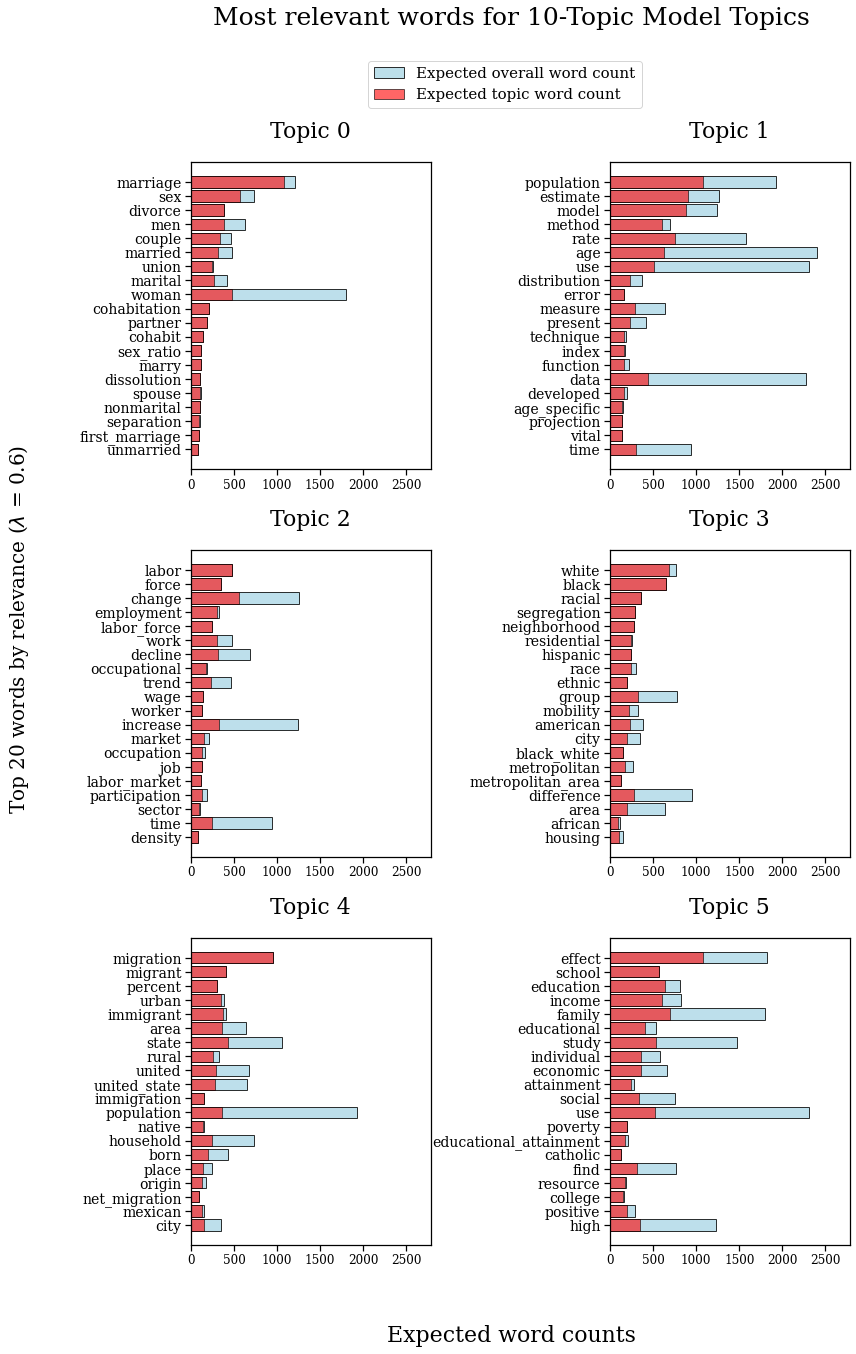

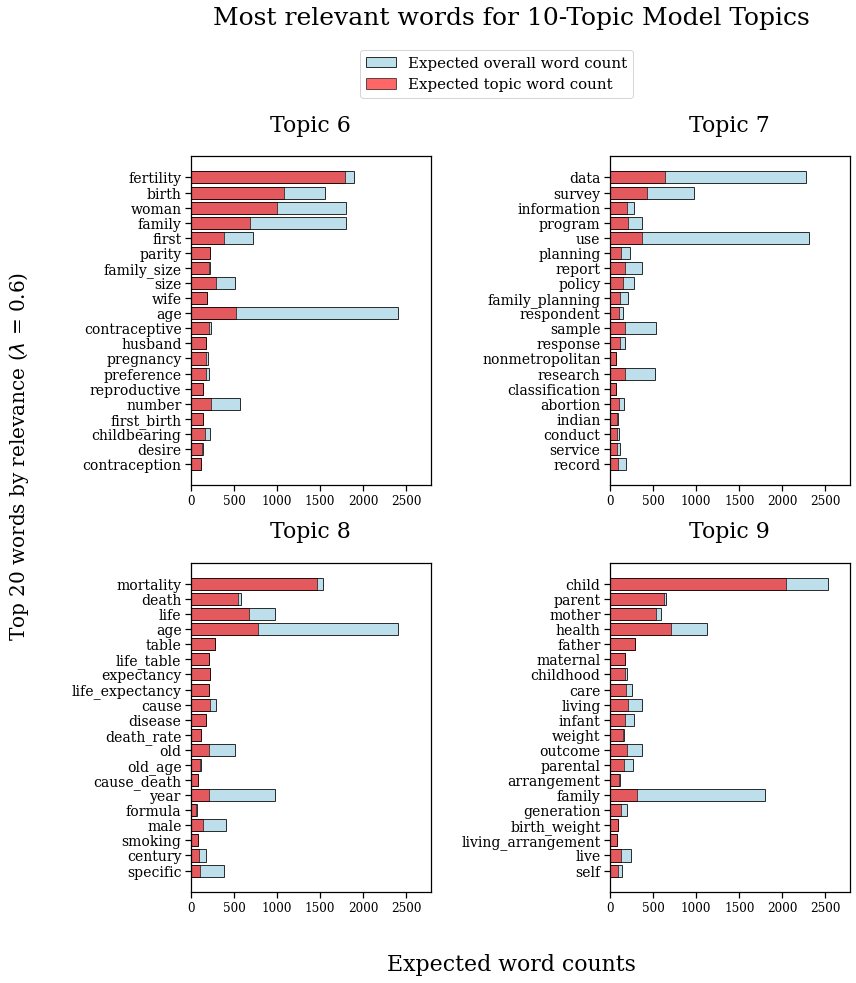

In [81]:
k=10
LdaOutputWordPlots.topic_relevance_grid(model = demog_model_dict[k],
                         corpus = demog_corpus,
                         dictionary = demog_dictionary,
                         plot_all_topics = True,
                         custom_list = None,
                         value_type = "counts", #again can specify counts or probabilities
                         plot_title_and_legend = True,
                         first_title_only = False, #if True, only plots title and legend for first grid
                         plot_overall_magnitudes = True,
                         h_pad = 7,
                         w_pad = 12,
                         theta_mat = demog_theta_dict[k], 
                         lamb = .6,
                         topn = 20,
                         minimum_probability = .01, 
                         save_all_plots = False)
                        

You can also use the function above to plot a custom list of topics

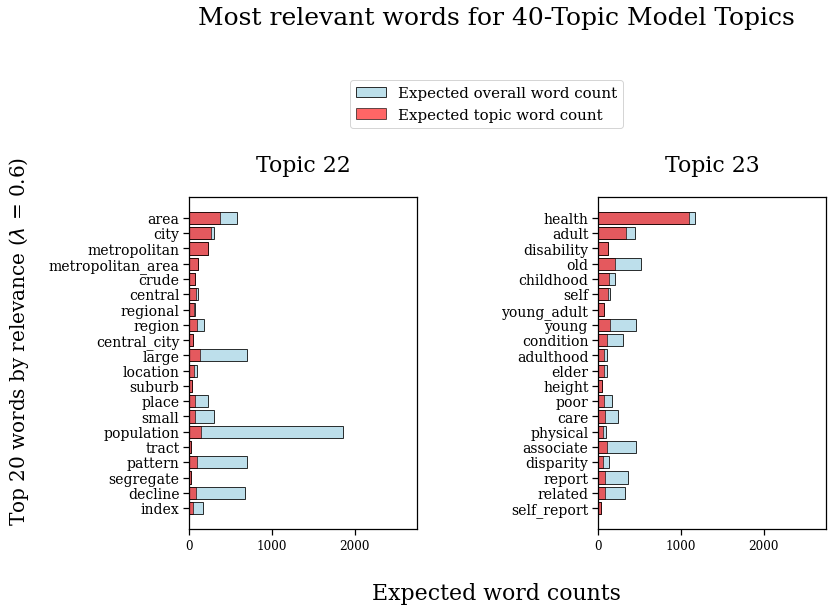

In [29]:
k=40
LdaOutputWordPlots.topic_relevance_grid(model = demog_model_dict[k],
                         corpus = demog_corpus,
                         dictionary = demog_dictionary,
                         plot_all_topics = False,
                         custom_list = [22,23],
                         value_type = "counts", #again can specify counts or probabilities
                         plot_title_and_legend = True,
                         first_title_only = False, #if True, only plots title and legend for first grid
                         theta_mat = demog_theta_dict[k], 
                         lamb = .6,
                         topn = 20,
                         minimum_probability = .01, 
                         save_all_plots = False)
                        

# Topic correlations and similarity

Compare the topics of two different models to see how they do or do not link up. Specify whether you want KL or JS divergence and whether you want the matrix normalized so that values fall between 0 and 1. The downside of normalizing is that if you wish to compare multiple such heatmaps, it masks any systematic shifts in the divergence values across plots

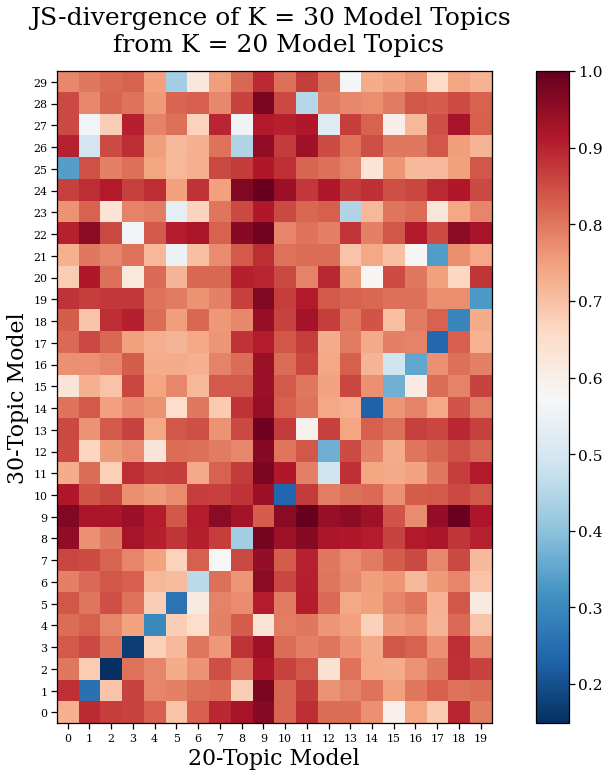

In [32]:
LdaOutputTopicSimilarity.plot_topic_heatmap(qmodel = demog_model_dict[20],
                                            pmodel = demog_model_dict[30], 
                                            distance = "jensen_shannon",
                                            normed = True, 
                                            save_fig = False)

Evaluate the similarity of topics within a single model

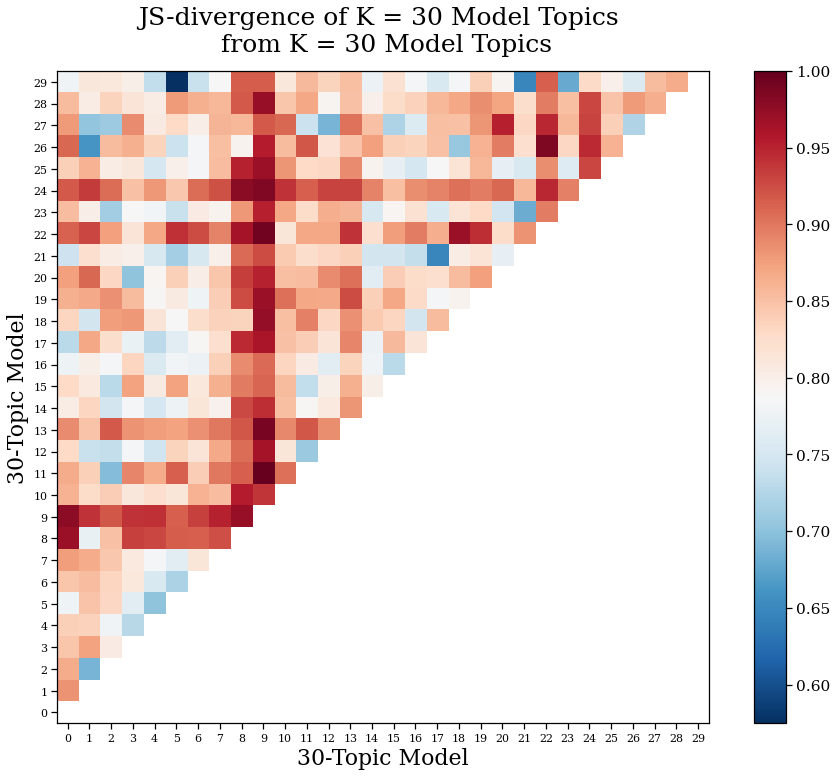

In [33]:
LdaOutputTopicSimilarity.plot_topic_heatmap(qmodel = demog_model_dict[30],
                                            pmodel = demog_model_dict[30], 
                                            distance = "jensen_shannon",
                                            normed = True, 
                                            save_fig = False)

Examine correlations between topics (in terms of pearson correlations between their $\theta$ matrices

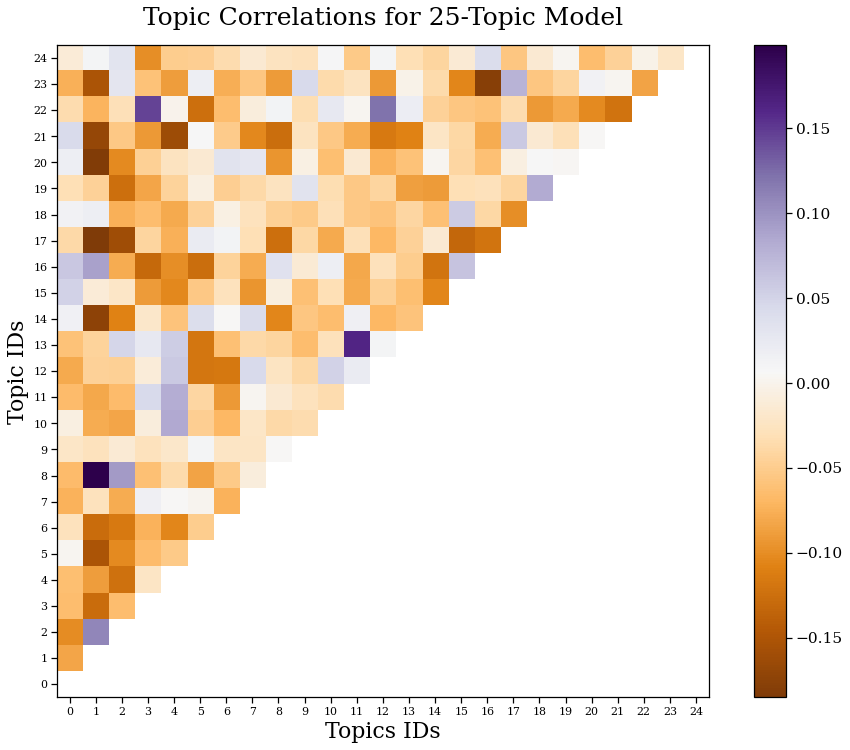

In [34]:
_ = LdaOutputTopicSimilarity.topic_correlations(demog_theta_dict[25],
                                                plot = True,
                                                save_fig = False)

# Topic Size 
see LdaOutputTopicSizePlots.py

* Get different measures of topic size for the K=20 Demography model
* Can choose to normalize sizes to be between 0 and 1 or not but if want to compare sizes, must normalize them

In [35]:
normalized = False
doc_lengths = LdaOutput.get_doc_lengths(demog_corpus)
word_counts = LdaOutput.get_topic_wordcounts(theta_mat = demog_theta_dict[20],
                                             doc_lengths = doc_lengths, 
                                             normalized = normalized)

doc_counts = LdaOutput.get_topic_doccounts(theta_mat = demog_theta_dict[20],
                                          normalized = normalized)

means = LdaOutput.get_topic_means(theta_mat = demog_theta_dict[20],
                                 normalized = normalized)

medians = LdaOutput.get_topic_medians(theta_mat = demog_theta_dict[20],
                                      normalized = normalized)
print("Medians are not useful - they are almost all 0")
print(medians) 

Medians are not useful - they are almost all 0
[0.         0.         0.         0.         0.         0.02032811
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


Get $K \times V$ matrix of expected counts for each word-topic combination. Calculated as $E(N_k)*\phi_{kv}$. That is: the expected number of words from topic $k$ * the probability of word $v$ in topic $k$ gives the expected number of times word $v$ is drawn from topic $k$.

In [47]:
#doc counts defined in previous box
perword_count_mat = LdaOutput.get_topic_perwordcounts(model = demog_model_dict[20],
                                                      theta_mat = demog_theta_dict[20],
                                                      doc_lengths = doc_lengths,
                                                      normalized = False)

Using output from function above, get expected count for each word overall, summed over all topics: $E(N_v)$

In [48]:
overall_counts = LdaOutput.get_overall_wordcounts(perword_count_mat)

Compare different measures of topic size. This plot becomes harder to read as $K$ grows.

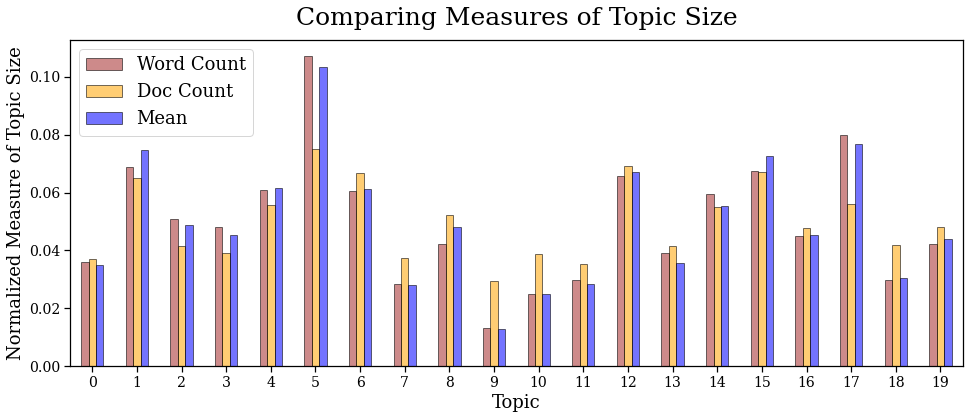

In [49]:
#topic size measures defined above
#function automatically normalizes them
_ = LdaOutputTopicSizePlots.topic_size_comparison_plot(word_counts = word_counts,
                      doc_counts = doc_counts,
                      medians = None,
                      means = means,
                      plot_type = "barplot",
                      plot_title = True,
                      figsize = (16, 6),
                      save_fig = False)
                    
plt.show()

The function above can be given 1, 2, 3 or 4 measures of topic size (though median is not recommended). For example, I can plot only word counts (below). I can also specify my own title if I like.

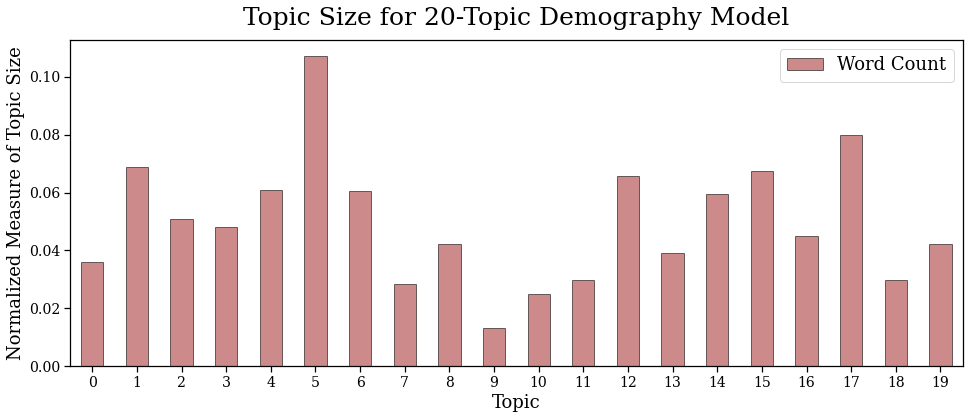

In [50]:
_ = LdaOutputTopicSizePlots.topic_size_comparison_plot(word_counts = word_counts,
                      doc_counts = None, 
                      medians = None,
                      means = None,
                      plot_type = "barplot",
                      plot_title = True,
                      custom_title = "Topic Size for 20-Topic Demography Model",
                      figsize = (16, 6),
                      save_fig = False)
                    
plt.show()

The same function can also create a scatterplot grid. This might be better for large $K$ but has disadvantage that you cannot see which sizes correspond to which topics.

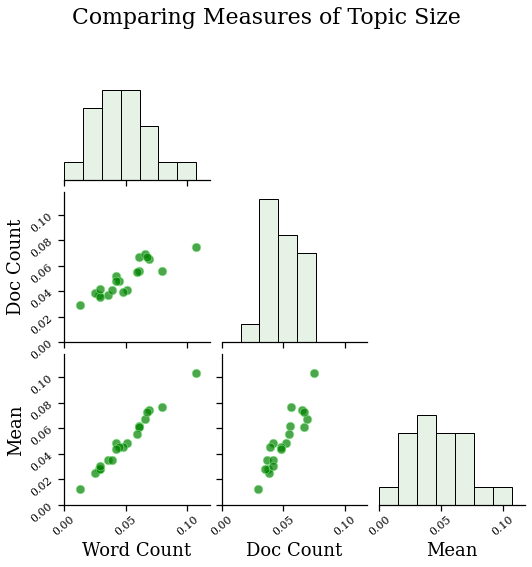

In [51]:
#topic size measures defined above
#function automatically normalizes them
_ = LdaOutputTopicSizePlots.topic_size_comparison_plot(word_counts = word_counts,
                      doc_counts = doc_counts,
                      medians = None,
                      means = means,
                      plot_type = "scatterplot",
                      nbins = 7, #controls diagonal histograms
                      plot_title = True,
                      figsize = (16, 6),
                      save_fig = False)
                    
plt.show()

Next, I might ask how topic sizes relate to other per-topic metrics: UMass coherence, KL-divergence from the overall corpus, topic entropy, and "percent highest frequency" (see LdaOutput.py for further explanation of these). The function below allows me to plot one such relationship...

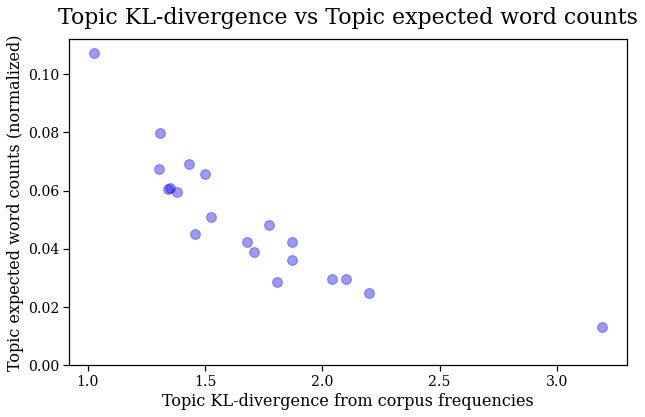

In [52]:
LdaOutputTopicSizePlots.metric_size_comparison(model = demog_model_dict[20],
                                               metric = "kl", 
                                               corpus  = demog_corpus, 
                                               dictionary = demog_dictionary,
                                               sizes = word_counts, 
                                               label = "expected word counts",
                                               figsize = (10,6), 
                                               set_figsize = True,
                                               plot_title = True,
                                               plot_ylabel = True,
                                               plot_xlabel = True,
                                               save_fig = False)

Or with the grid version of that function, I can plot all four...

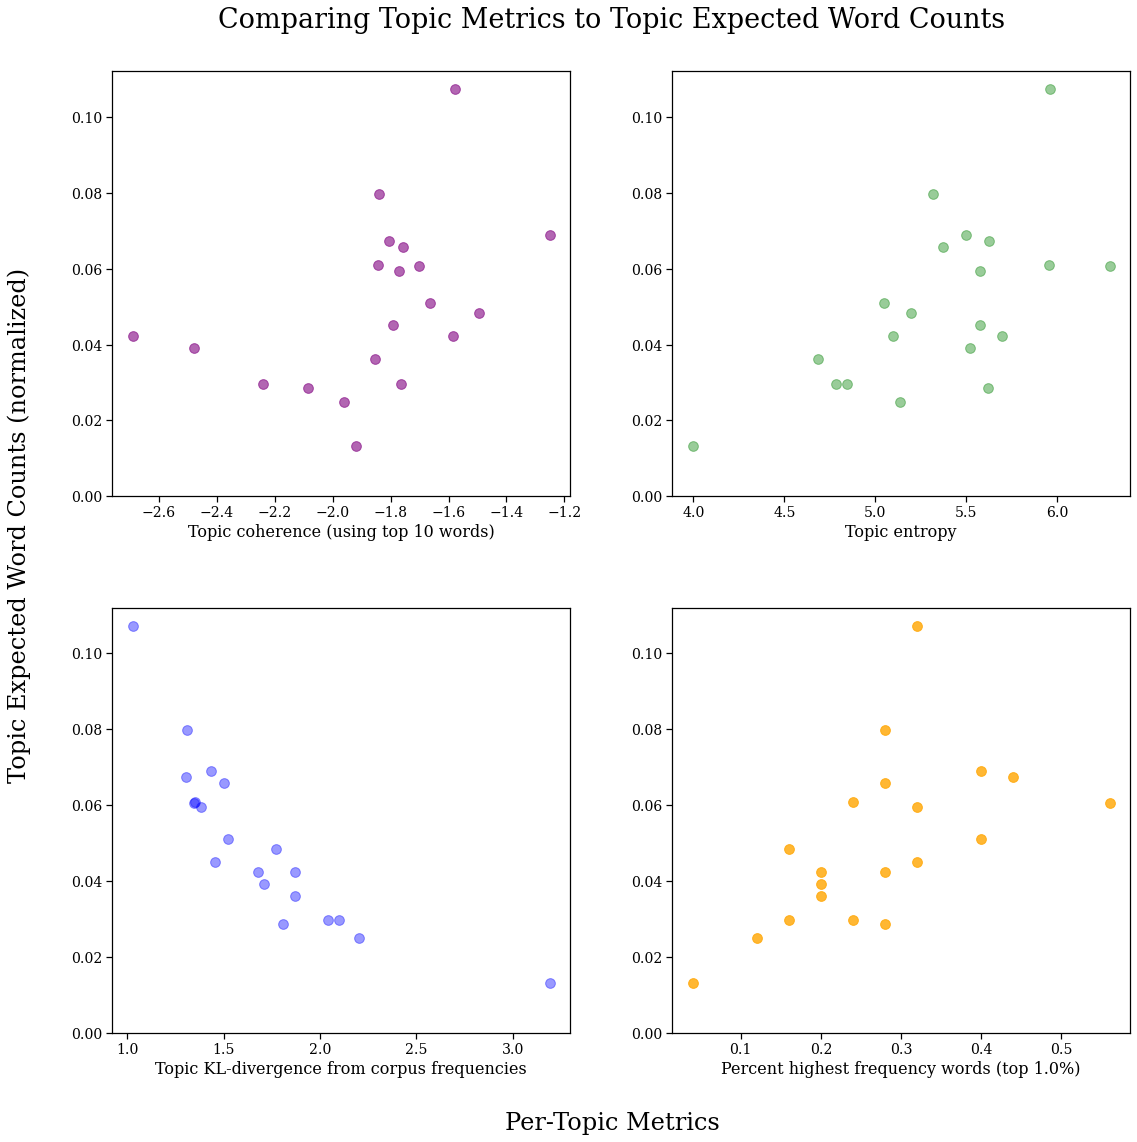

In [53]:
LdaOutputTopicSizePlots.metric_size_comparison_grid(model = demog_model_dict[20], 
                            corpus = demog_corpus,
                            dictionary = demog_dictionary,
                            sizes = word_counts,
                            label = "Expected Word Counts")


I might also be curious how the topic sizes correspond to learned (or pre-specified) $\alpha$ values in the LDA model. We'd expect them to be quite correlated. Note that you can give this function any measure of size and an appropriate label

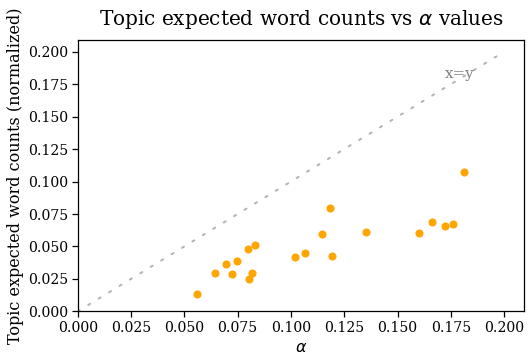

In [54]:
LdaOutputTopicSizePlots.alpha_comparison_plot(model = demog_model_dict[20],
                                              sizes = word_counts, 
                                              label = "expected word counts",
                                              color = "orange")
plt.show()

# Topics over time

See LdaOutputTimePlots.py

**Topic size over time plot for single topic together with its top words**

Can use either expected word counts, document counts, or mean $\theta_{dk}$ as your measure of topic size. For "word_count", you will need to specify the lengths of the documents in the corpus.

Steps
0. Choose a model
1. (If needed) get document lengths
2. Create a dictionary of topic sizes for each topic by year, specifying what kind of size measurement you want(keys of dictionary are years)
3. Feed it into plotting function

**Note** you can use right_zoom or left_zoom to zoom in on a continuous section of years. Below, right_zoom eliminates 2021, the last year observed

**Note** strongly recommend normalized = True because if there are different numbers of documents per year and the sizes are unnormalized, then size differences will just reflect that. 

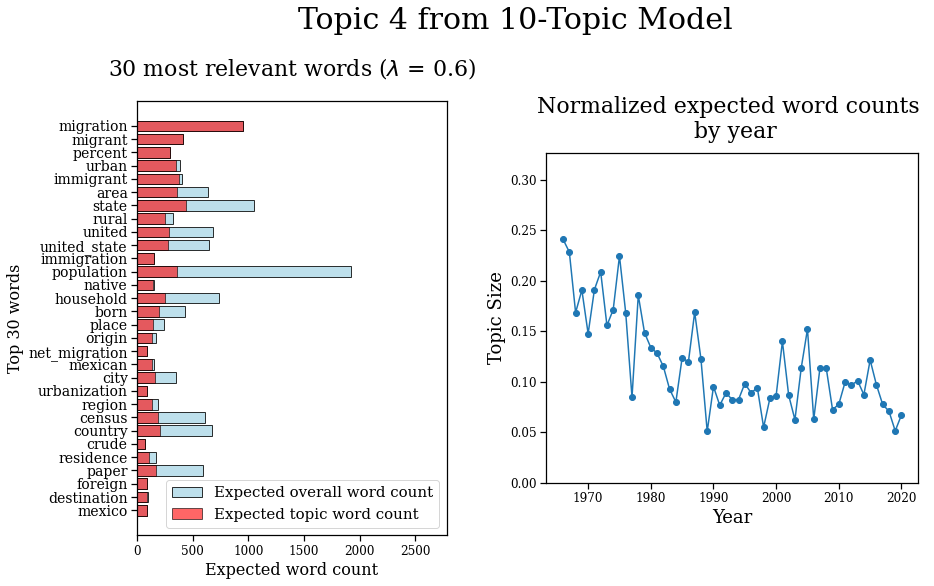

In [55]:
k=10
doc_lengths = LdaOutput.get_doc_lengths(demog_corpus)

per_year_size_dict = LdaOutput.get_per_group_topic_size(theta_mat = demog_theta_dict[k],
                                   label_list = demog_year_labels,
                                   sizetype = "word_count", 
                                   doc_lengths = doc_lengths,
                                   normalized = True)

LdaOutputTimePlots.plot_barplot_and_timeplot(model = demog_model_dict[k], 
                                             per_year_size_dict = per_year_size_dict,
                                             custom_suptitle = None,#"Topic 13",
                                             theta_mat = demog_theta_dict[k],
                                             topic_id = 4,
                                             figsize = (14,10),
                                             detect_max_vals = True,
                                             sizelabel = "Normalized expected word counts \n",
                                             corpus = demog_corpus,
                                             dictionary = demog_dictionary,
                                             value_type = "counts",
                                             right_zoom = 1,
                                             left_zoom = 0, #don't cut off any on the left
                                             topn = 30,
                                             lamb = 0.6)


**Plot grid of all topics over time or a custom list**

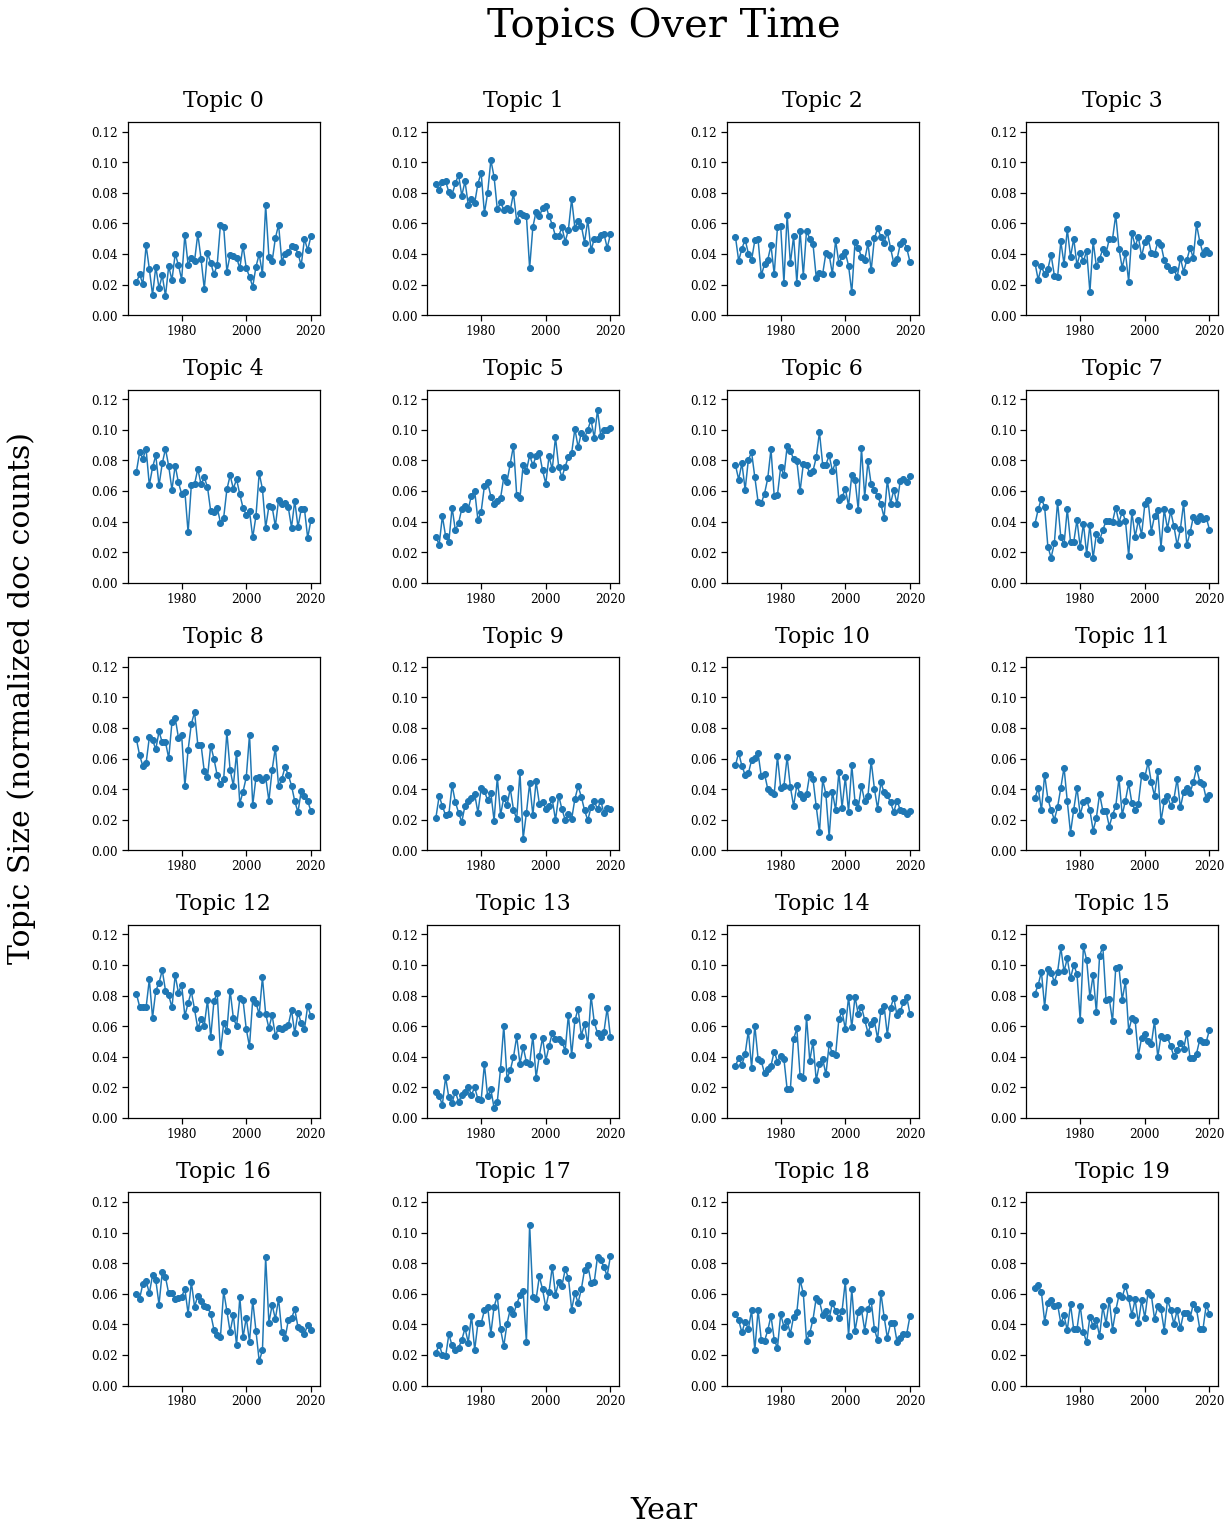

In [56]:
k = 20
LdaOutputTimePlots.plot_topic_sizes_by_year(theta_mat = demog_theta_dict[k],
                          year_labels = demog_year_labels,
                          sizetype = "doc_count",
                          doc_lengths = None, #not necessary because using doc counts here
                          plot_all_topics = True, #if True, plots all topics over time, if False, uses custom list below
                          custom_topic_list = [4,5,6,7,8,14],
                          left_zoom = 0, 
                          right_zoom = 1,
                          x_tick_rotation = 0,
                          save_fig = False
                          )

**Sensitivity Analysis:** Do similar topics from different models have similar time trends?

* Note there are two moving parts here: topic similarity and the way topics are assigned to documents ($\theta_{dk}$) to produce size counts for those topics
* Again can specify all topics or a custom list
* Note: more than two comparison models is not recommended. No gaurantees spacing of legend works beyond 3 either.

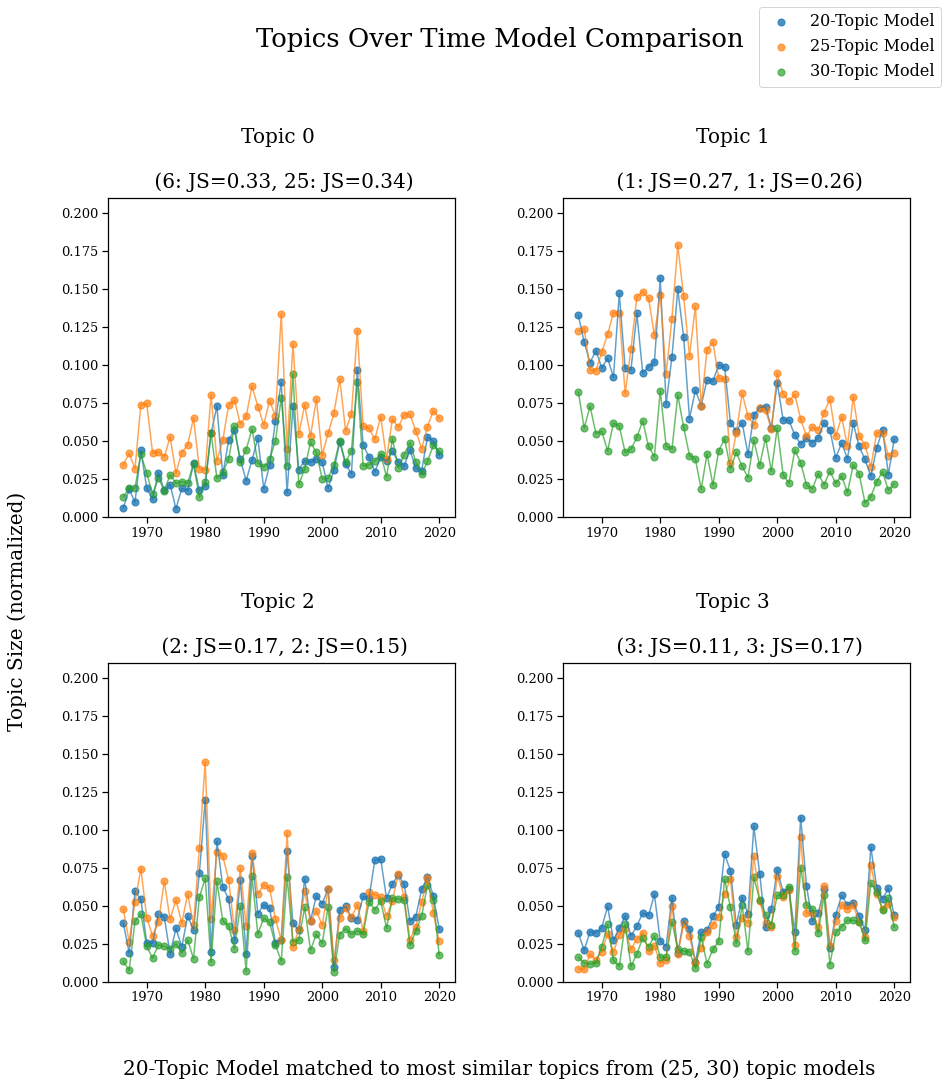

In [32]:
demog_doc_lengths = LdaOutput.get_doc_lengths(demog_corpus)

LdaOutputTimePlots.topic_size_by_year_model_comparison(year_labels = demog_year_labels,
                                          main_model = demog_model_dict[20], 
                                                       theta_mat_main = demog_theta_dict[20],
                                                       model_list = [demog_model_dict[k] for k in [25,30]],
                                                       theta_mat_list = [demog_theta_dict[k] for k in [25,30]],
                                                       sizetype = "word_count",
                                                       doc_lengths = demog_doc_lengths,
                                                       plot_all_topics = False,
                                                       custom_list = [0,1,2,3],
                                                       left_zoom = 0,
                                                       right_zoom = 1,
                                                       save_fig = False)

**Examine topics by year -- Approach 1**

1. Generate a dictionary of year-specific topics over the vocabulary, calculated using expected counts
2. Feed output into plotting function

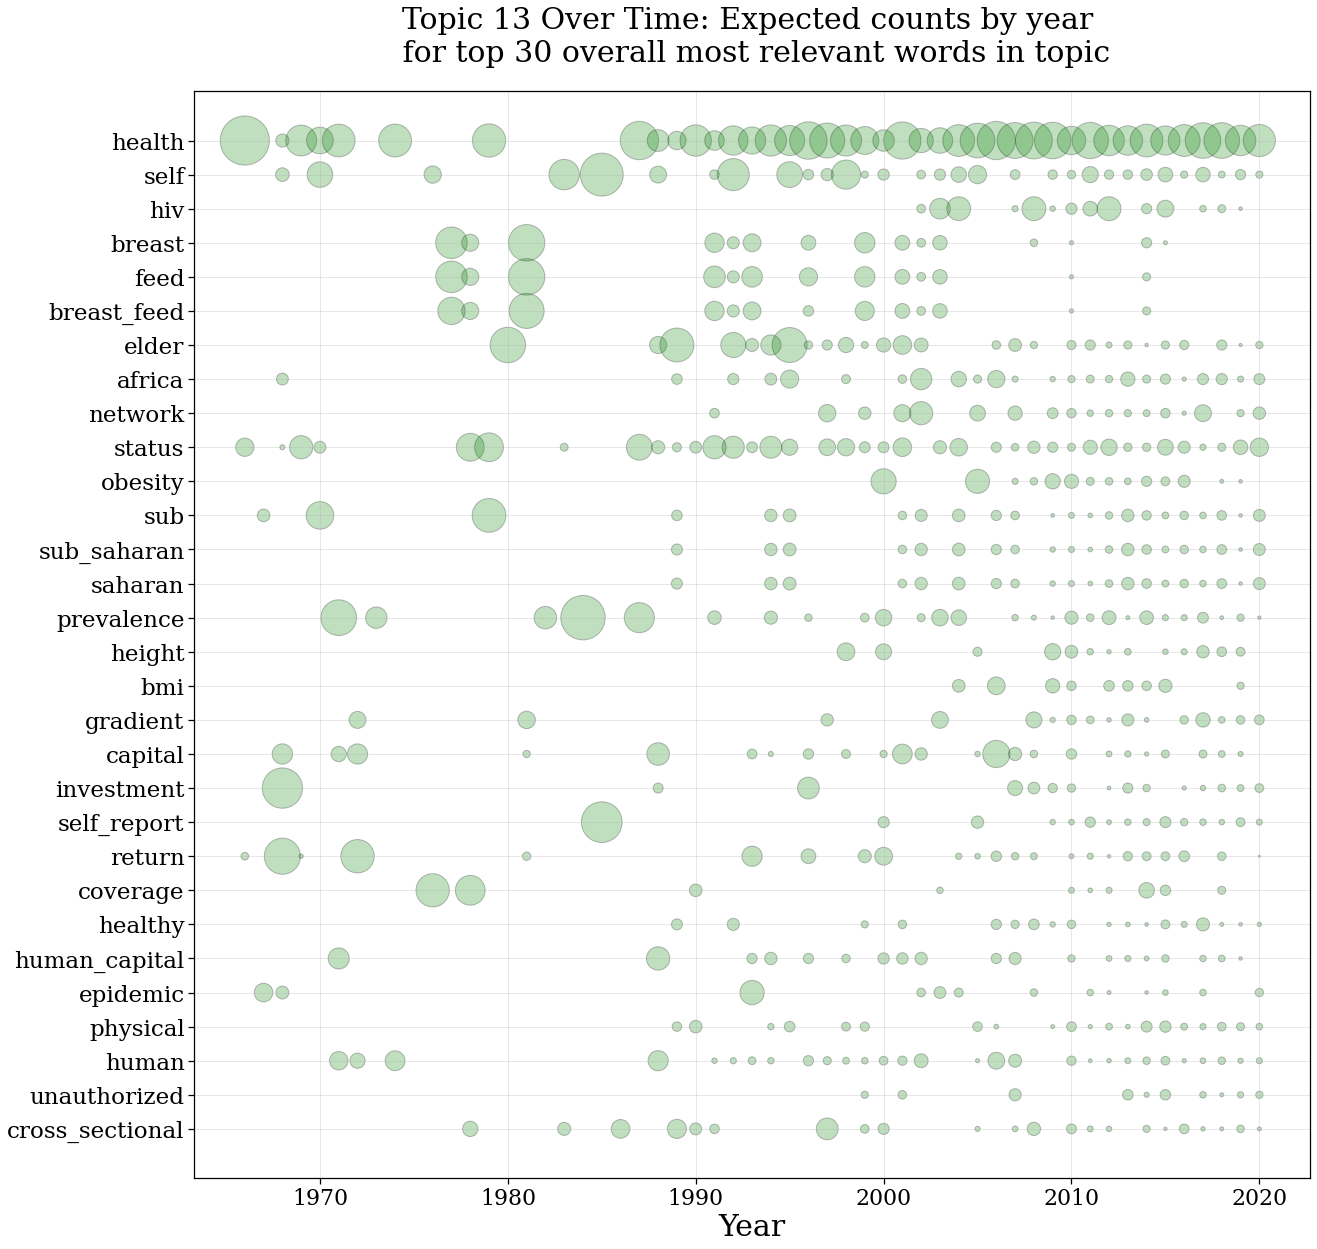

In [33]:
k = 20
topic_id = 13

per_year_topics_dict = LdaOutput.get_per_group_topics(demog_wordtopic_dict[k], 
                                                      label_list = demog_year_labels,
                                                      normalized = True,
                                                      save_dict = False)
                                                    
_ = LdaOutputTimePlots.plot_topic_by_year(per_year_topics_dict, 
                   topic_id = topic_id,
                   model = demog_model_dict[k],
                   figsize = (20,20),
                   corpus = demog_corpus,
                   dictionary = demog_dictionary,
                   lamb = 0.6, 
                   topn = 30,
                   right_zoom = 1, 
                   left_zoom = 0,
                   color = "green",
                   alpha = 0.25)

**Examine Topics by Year -- option 2**

You can also get top words for each per-year topic. The plot above shows the overall most relevant words for the topic but if the words in a topic vary enough, it could be that this masks some variation. The circles can also be hard to read.  The problem with the approach below is that it generates a very large number of plots (56 for 56 years for Demography data). I therefore have included an option **custom_groups** below, which can be used to plot a topic only over a certain range of years (or a manual list such as [2000, 2005, 2010])

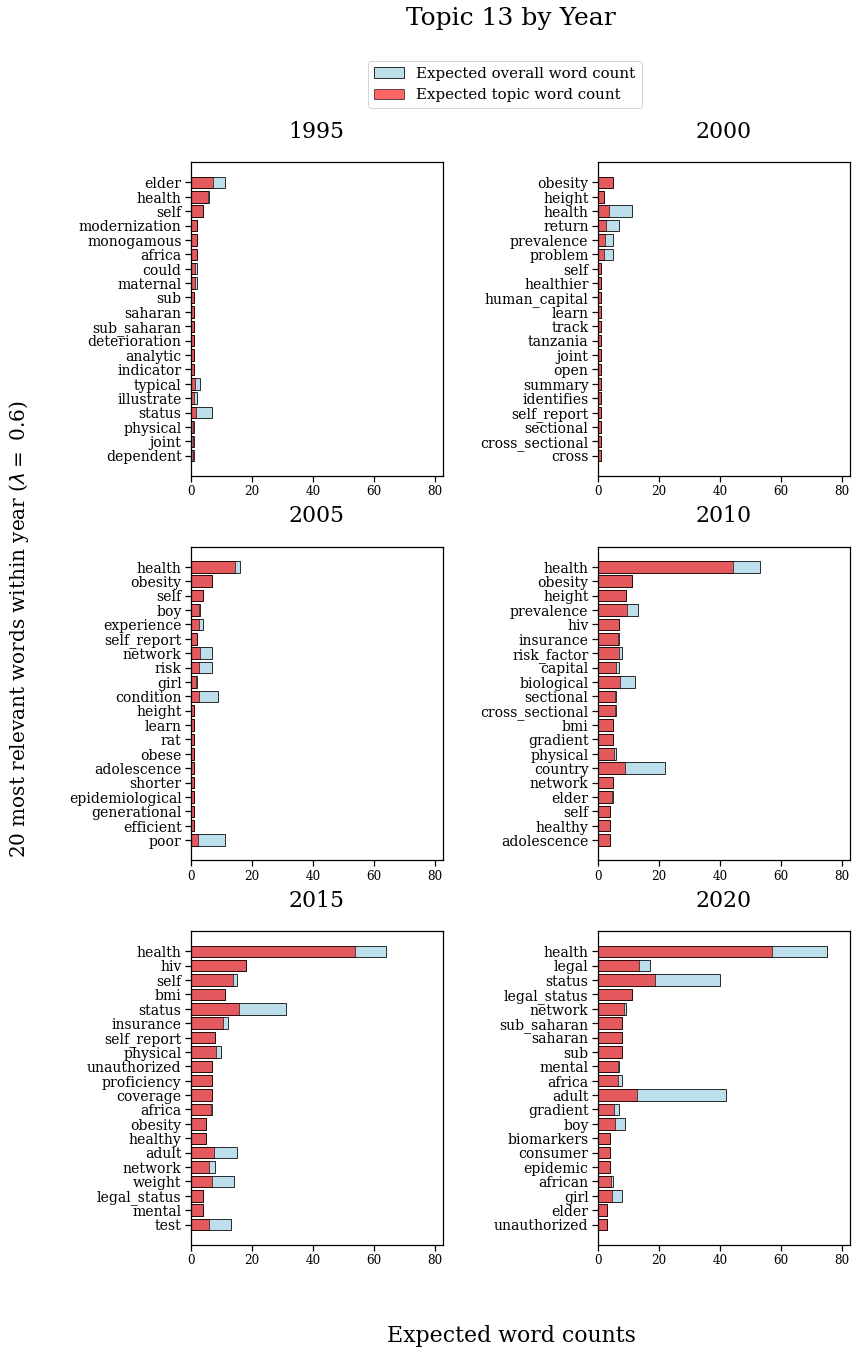

In [73]:
k = 20
LdaOutputGroupPlots.plot_topic_words_by_group(wordtopic_array = demog_wordtopic_dict[k],
                              group_list =  demog_year_labels,
                              value_type = "counts",
                              custom_groups = list(range(1995,2021,5)),
                              to_plot_list = [13],
                              corpus = demog_corpus,
                              dictionary = demog_dictionary,
                              topn = 20,
                              lamb = 0.6, 
                              h_pad = 6,
                              w_pad = 10,
                              group_name = "Year",
                              plot_overall_magnitudes = True,
                              save_fig = False) #separately saves all figs produced

# Topics by group

**Examine topic size by group**

* Generate a dictionary of sizes for each topic for each group, then pass it to plotting function

In [58]:
k = 15
doc_lengths = LdaOutput.get_doc_lengths(socio_corpus)
per_group_size_dict = LdaOutput.get_per_group_topic_size(theta_mat = socio_theta_dict[k], 
                                   label_list = socio_journals,
                                   sizetype = "word_count", 
                                   doc_lengths = doc_lengths,
                                   normalized = True) #doesn't make sense to plot this without normalizing

* plotting option 1: grouped by topic
* plotting option 2: grouped by group label
* plotting option 3: scatterplot

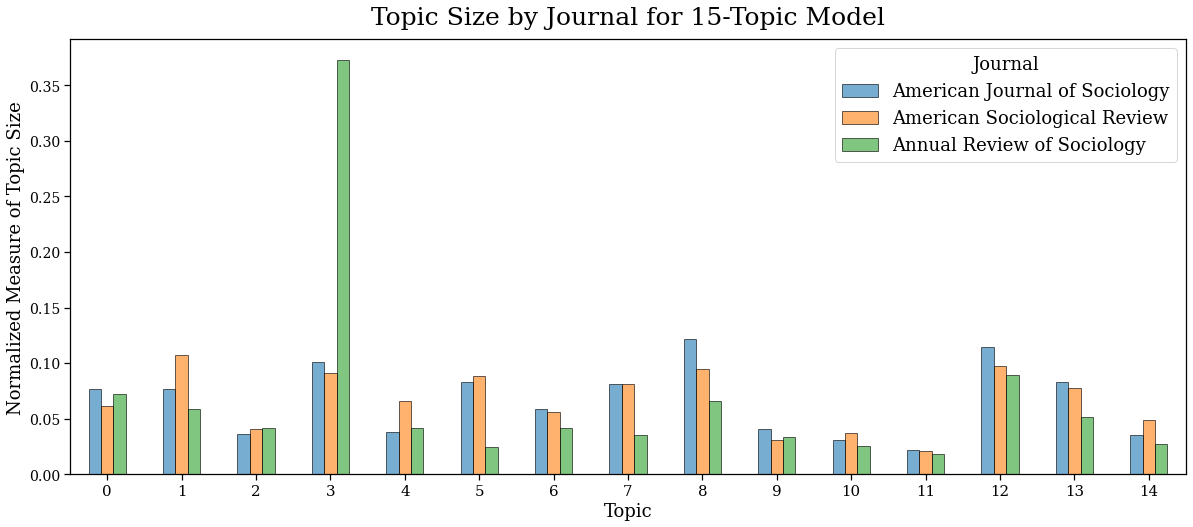

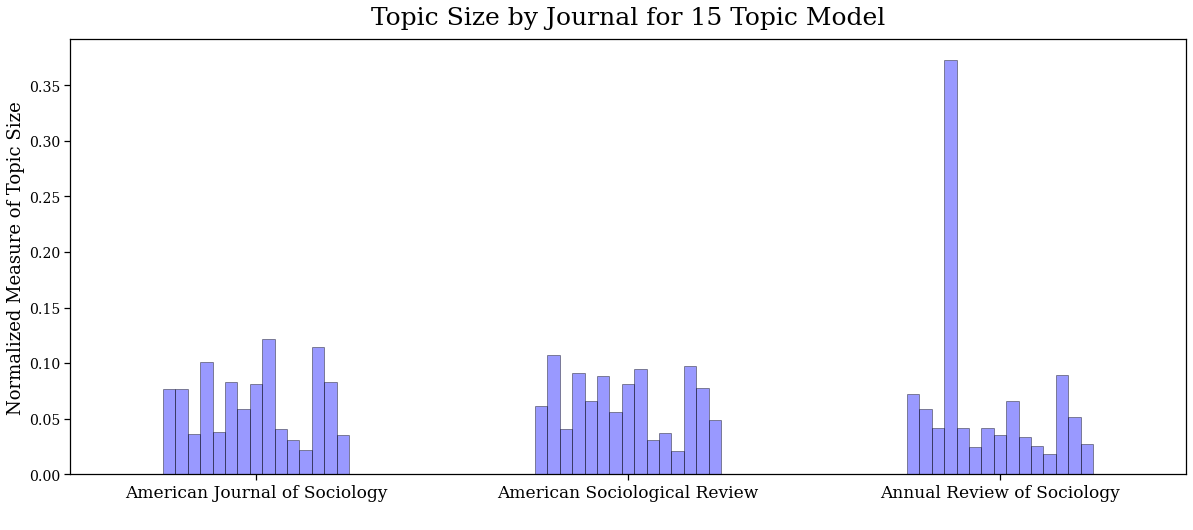

In [59]:
LdaOutputGroupPlots.plot_topic_size_by_group(per_group_size_dict, 
                                             "barplot_by_topic",
                                             group_name = "Journal",
                                            legend_outside_plot = False,
                                            save_fig = False)

LdaOutputGroupPlots.plot_topic_size_by_group(per_group_size_dict, 
                                             "barplot_by_group",
                                             group_name = "Journal",
                                            plot_topic_colors = False, #not recommended for moderately large K (>10)
                                            legend_outside_plot = True,
                                            save_fig = False)

**Words within topics: Option 1** -- look at top overall most relevant words in topic and see if there are group level differences. This plot can sometimes be a bit difficult to read. The hazard of using circles here is that it is hard to judge their relative sizes.

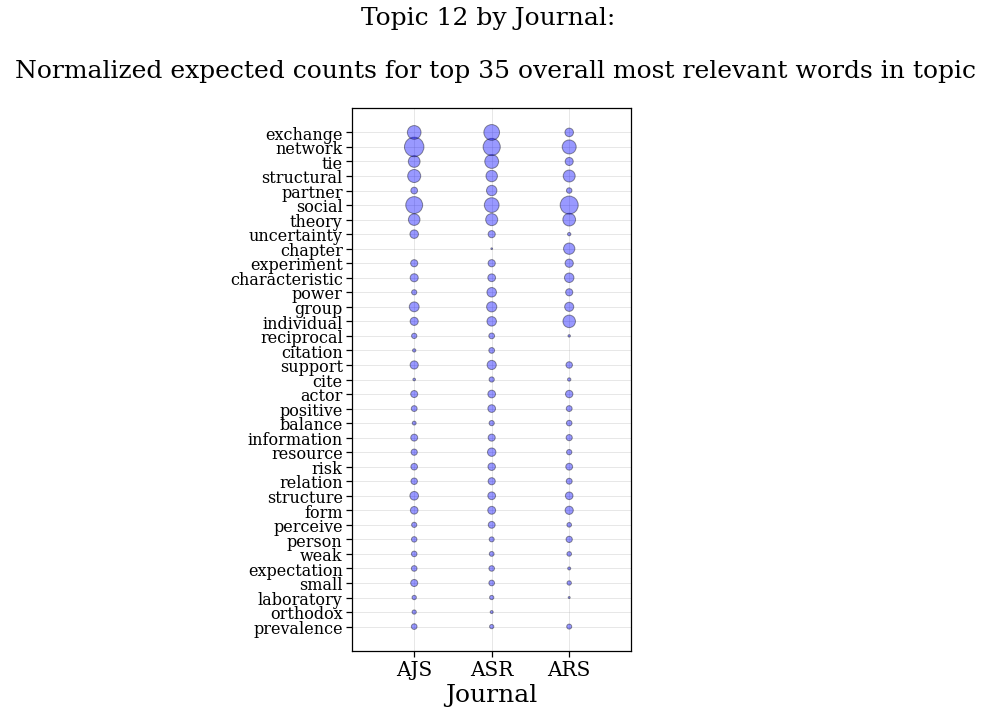

In [60]:
k = 20
per_group_topics_dict = LdaOutput.get_per_group_topics(socio_wordtopic_dict[k], 
                                                      label_list = socio_journals,
                                                      normalized = True)

LdaOutputGroupPlots.plot_topic_by_group(per_group_topics_dict, 
                       topic_id = 12, 
                       model = socio_model_dict[k],
                       corpus = socio_corpus,
                       dictionary = socio_dictionary, 
                       magnifier = 10000, #affects size of circles
                       xtick_rotation = 0,
                       lamb = 0.6, 
                       topn = 35, 
                       color = "blue",
                       alpha = 0.4,
                       color_by_group = False, 
                       figsize = (5,10),
                       group_label = "Journal",
                       group_label_list = ["AJS","ASR","ARS"])

**Words within topics: Option 2** -- look at top words in group-specific topics. This can be more feasible for groups with lower # of levels (such as 3 journals). If you give it a list of multiple topics to plot, it will generate a grid (or multiple) per topic.

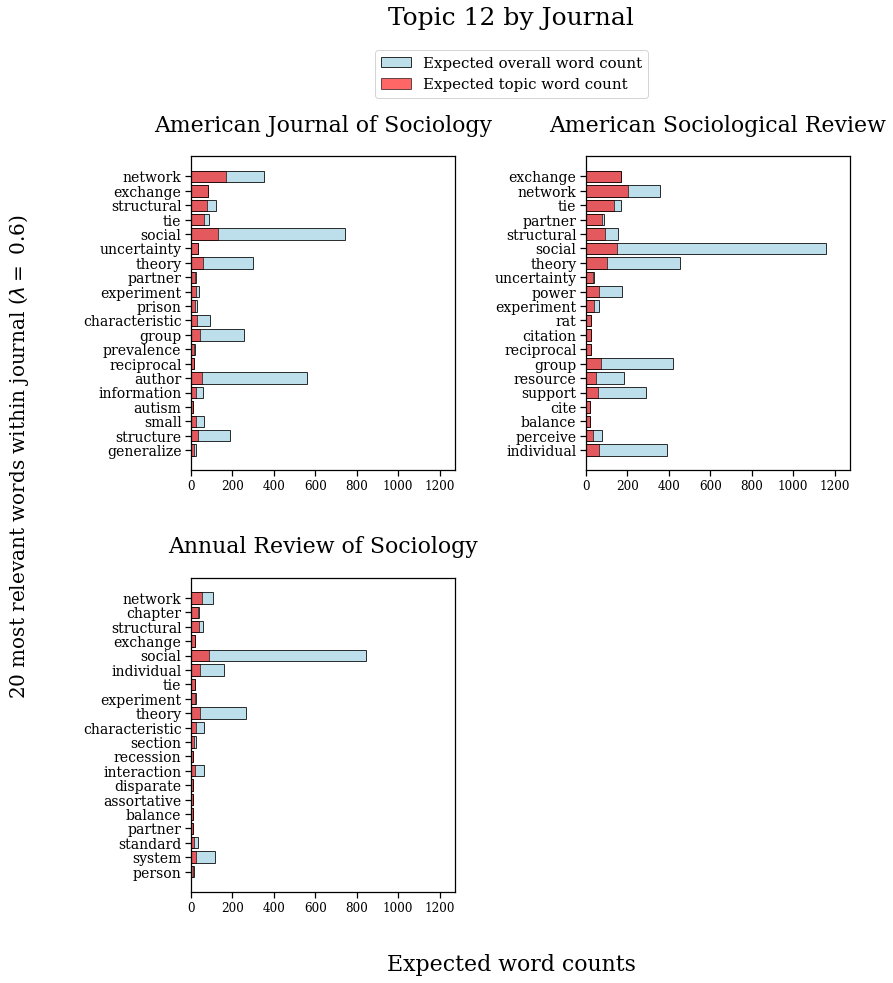

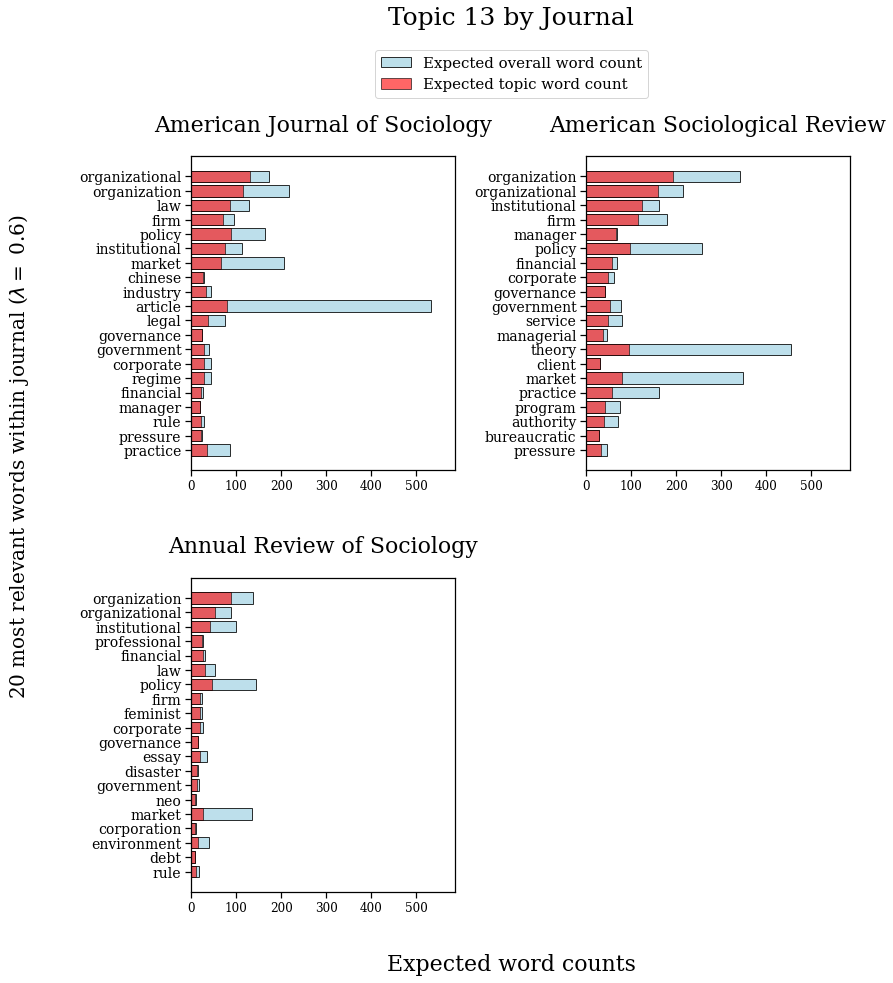

In [78]:
k = 20

LdaOutputGroupPlots.plot_topic_words_by_group(wordtopic_array = socio_wordtopic_dict[k],
                              group_list =  socio_journals,
                              value_type = "counts",
                              to_plot_list = [12, 13],
                              corpus = socio_corpus,
                              dictionary = socio_dictionary,
                              topn = 20,
                              lamb = 0.6, 
                              h_pad = 10,
                              w_pad = 8,
                              group_name = "Journal",
                              plot_overall_magnitudes = True,
                              save_fig = False) #separately saves all figs produced


# Groups over time


First I introduce the "zoom_dict". This is a dictionary with keys equal to each group and values equal to tuples specifying how much to zoom for each group. For example, if one group doesn't have data for 2010-2020 but the others do and you want to focus just on a plot for 2000-2010, then you would specify (0,10) for those that have 2010-2020 observations (so as to not plot them) but (0,0) for the one that only has observations up to 2009. Below, I create a zoom_dict to avoid plotting the year 2021 for the two journals that have 2021 observations

In [39]:
#use this to take out 2021 for the two journals that have 2021 observations
zoom_dict = {}
for g in np.unique(socio_journals):
    zoom_dict[g] = (0,1)
    
zoom_dict["Annual Review of Sociology"] = (0,0)

Plot a single topic by group over time

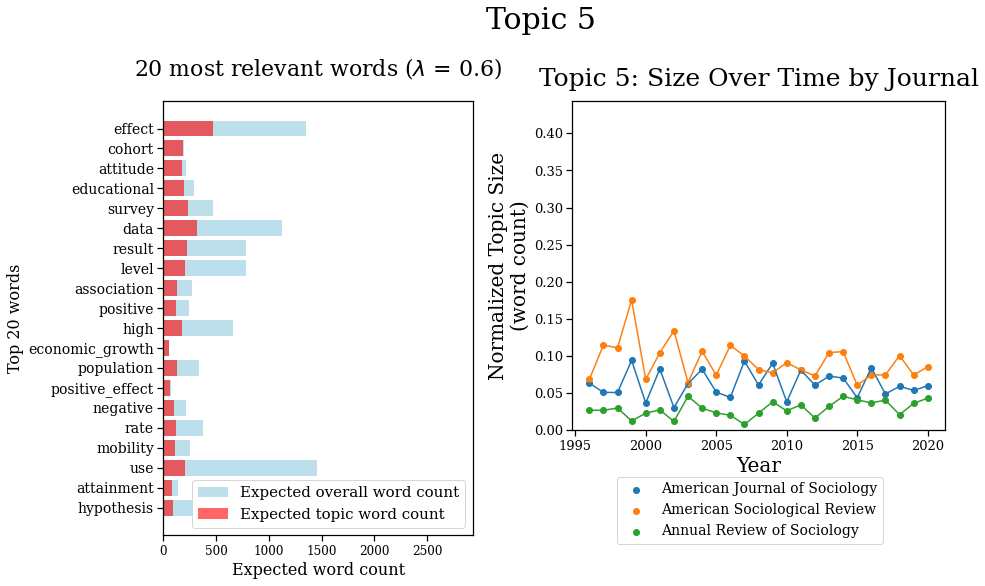

In [40]:
k = 20
topic_id = 5

LdaOutputGroupPlots.plot_barplot_and_grouped_timeplot(
    model = socio_model_dict[k],
    topic_id = topic_id,
    corpus = socio_corpus,
    dictionary = socio_dictionary,
    theta_mat = socio_theta_dict[k],
    group_list = socio_journals, 
    year_list = socio_year_labels, 
    doc_lengths = doc_lengths,
    sizetype = "word_count",
    zoom_dict = zoom_dict,
    legend_label = "", 
    title_group_label = "Journal",
    value_type = "counts",
    topn = 20, 
    lamb = 0.6, 
    detect_max_val = True, 
    plot_suptitle = True, 
    custom_title = "Topic %d" % topic_id,
    figsize = (14,10),
    save_fig = False)

Can focus on just the topics over time for a single topic

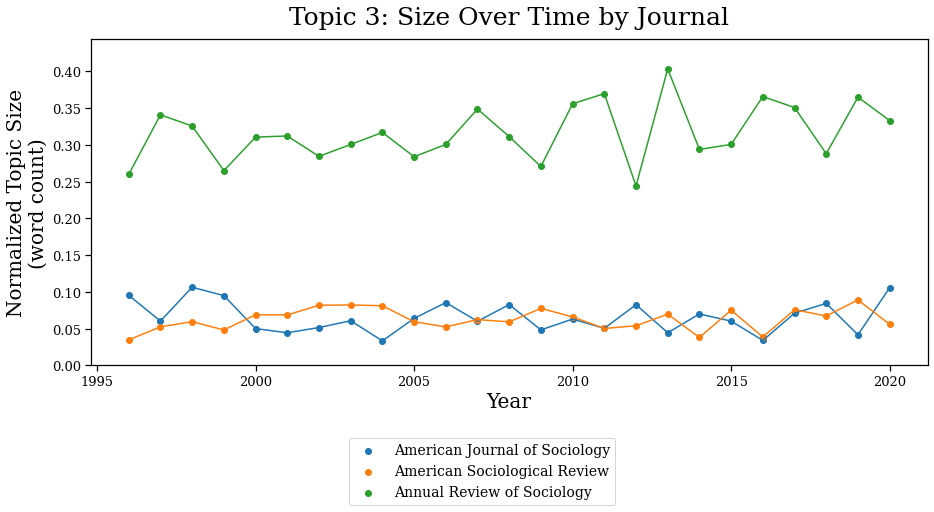

In [41]:
k = 20

doc_lengths = LdaOutput.get_doc_lengths(socio_corpus)
_ = LdaOutputGroupPlots.topic_by_group_time_plot(theta_mat = socio_theta_dict[k],
                   group_list = socio_journals,
                   year_list = socio_year_labels,
                   zoom_dict = zoom_dict,
                   doc_lengths = doc_lengths,
                   sizetype = "word_count",
                   to_plot_list = [3],
                   title_group_label = "Journal",
                   legend_label = "",
                   detect_max_val = True,
                   legend_outside_plot = True,                             
                   legend_loc = (.3,-.2),
                   figsize = (15,6),
                   save_fig = False)

Using same function, can also plot a grid with all topics by group over time (to_plot_list = "all") or a custom subset (e.g., to_plot_list = [1,2,3])

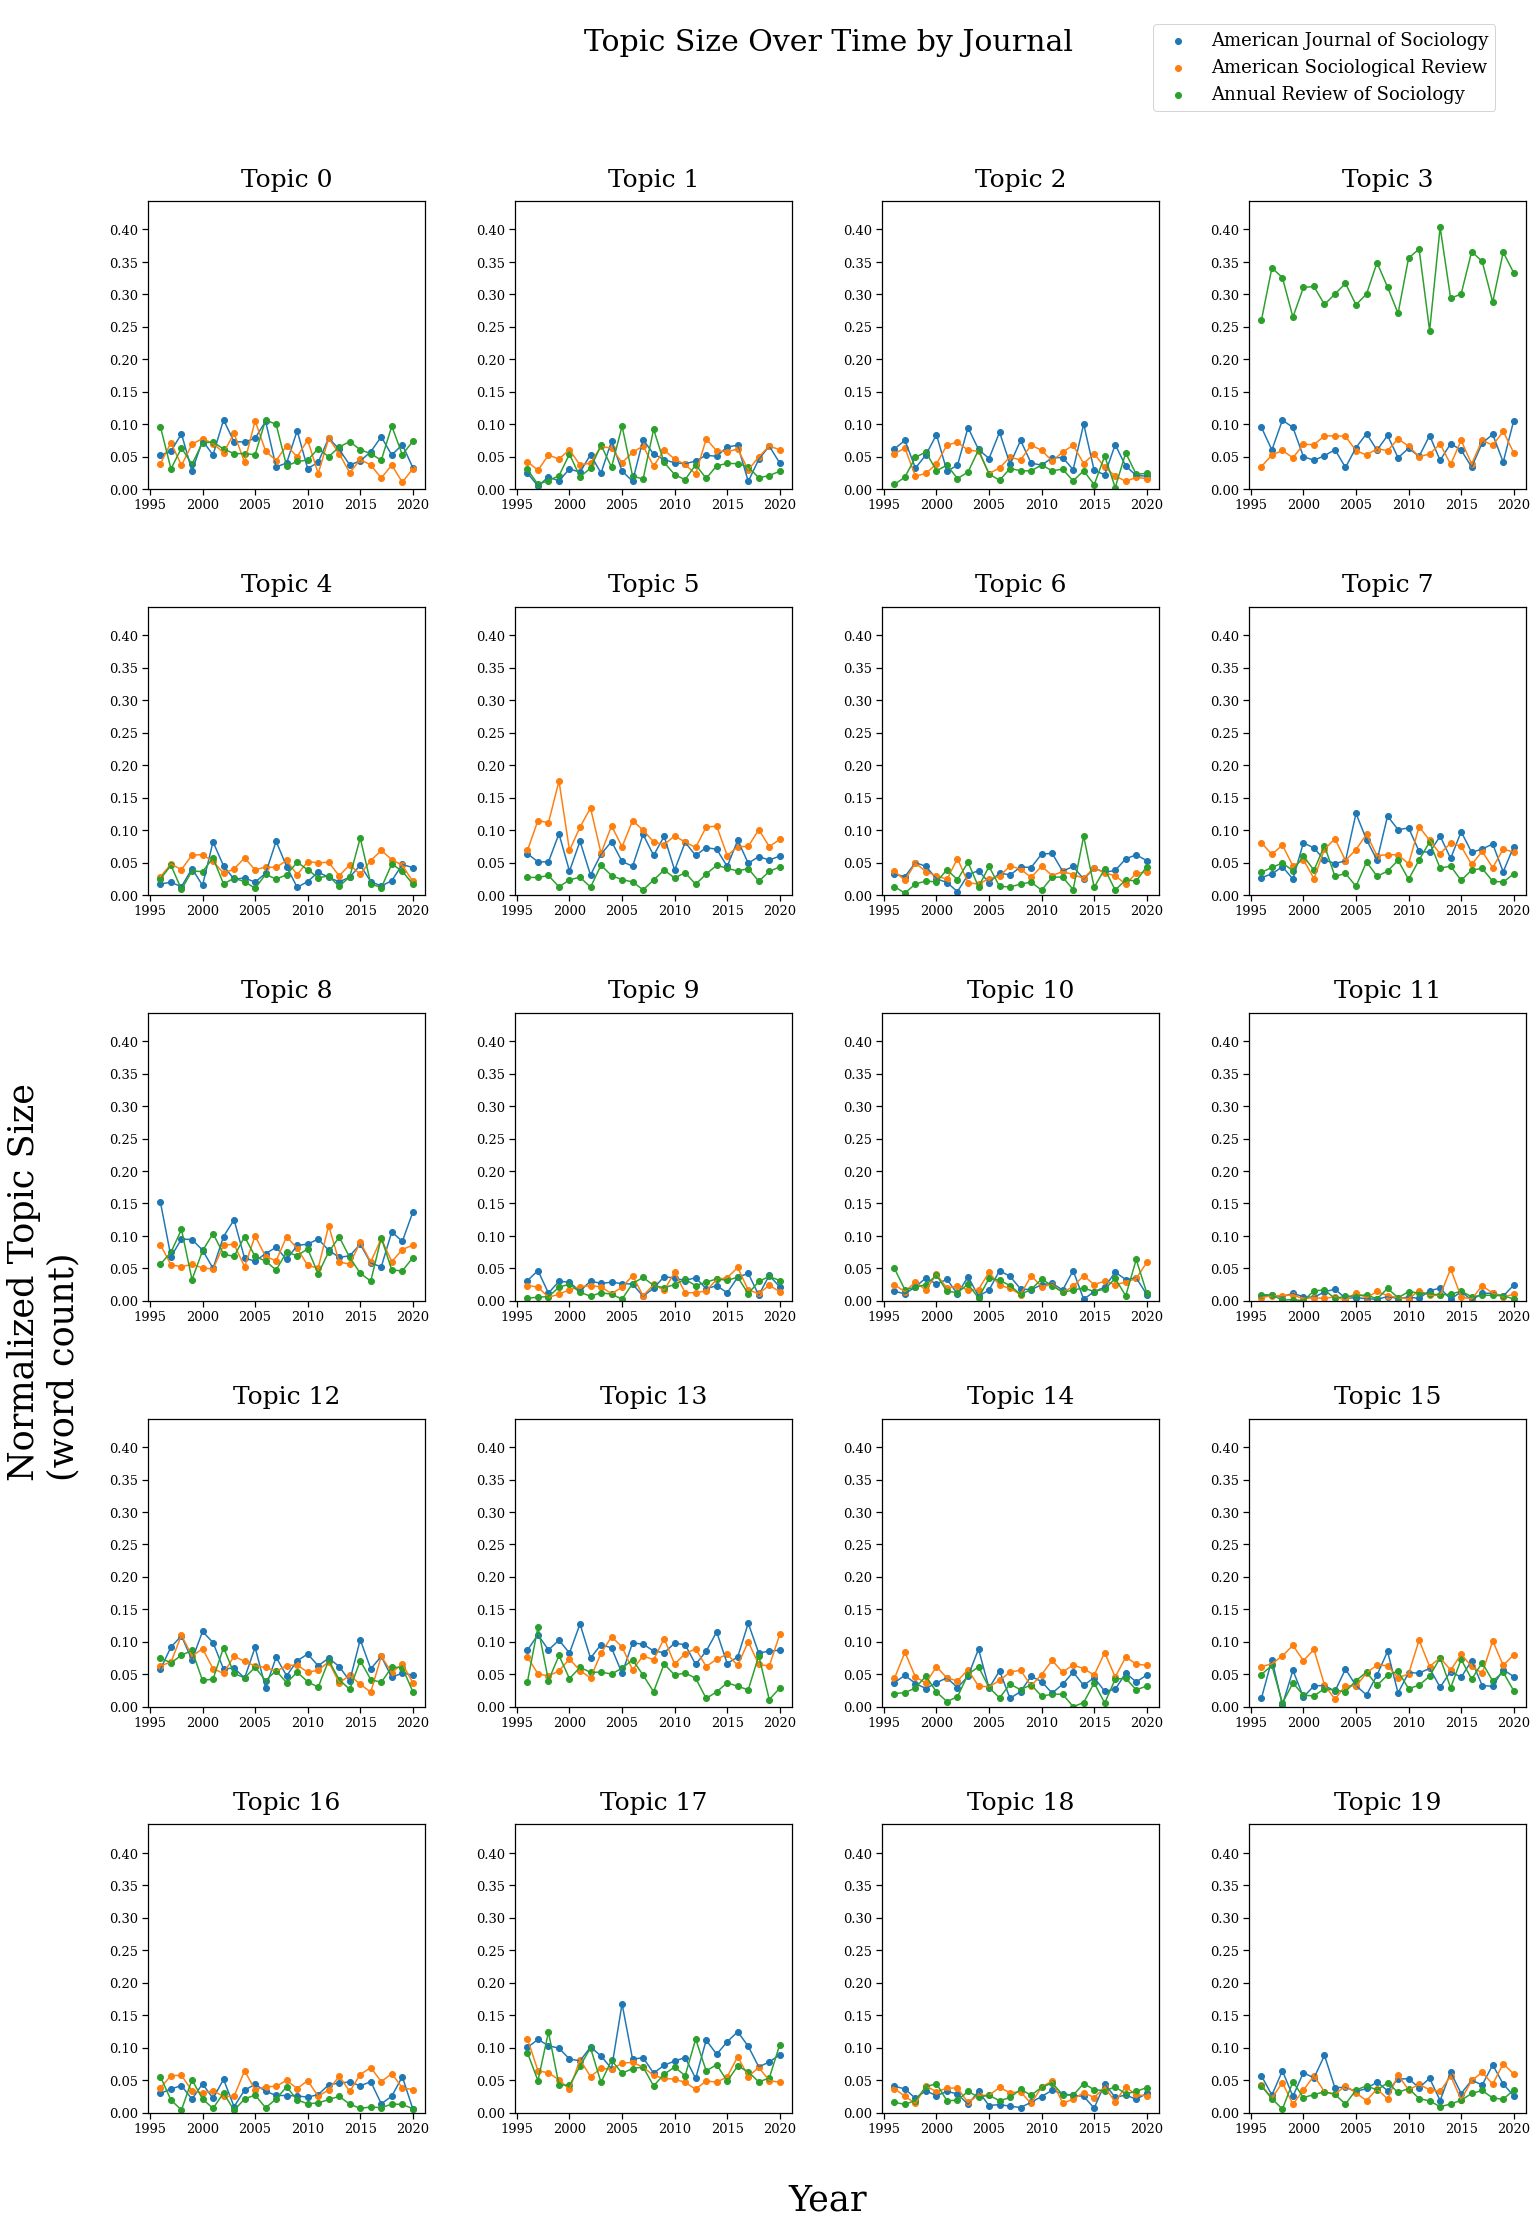

In [42]:
k = 20

doc_lengths = LdaOutput.get_doc_lengths(socio_corpus)
_ = LdaOutputGroupPlots.topic_by_group_time_plot(theta_mat = socio_theta_dict[k],
                   group_list = socio_journals,
                   year_list = socio_year_labels,
                   zoom_dict = zoom_dict,
                   doc_lengths = doc_lengths,
                   sizetype = "word_count",
                   to_plot_list = "all",
                   title_group_label = "Journal",
                   legend_label = "",
                   legend_loc = (0,-.1),
                   detect_max_val = True,
                   legend_outside_plot = True,                             
                   save_fig = False)

# Document-level analysis

Examine the number of topics per document ($\theta_{dk}\neq0$) either individually or by group

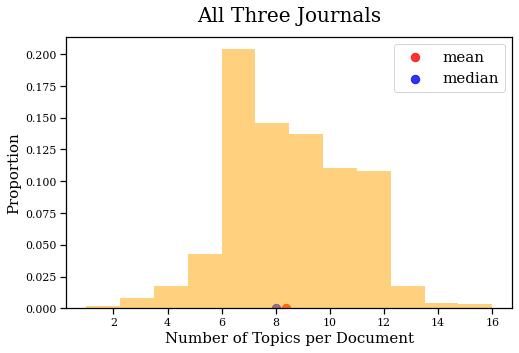

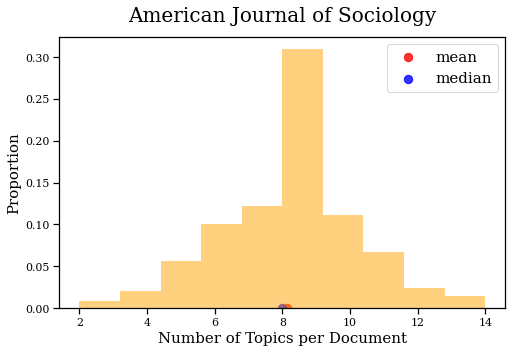

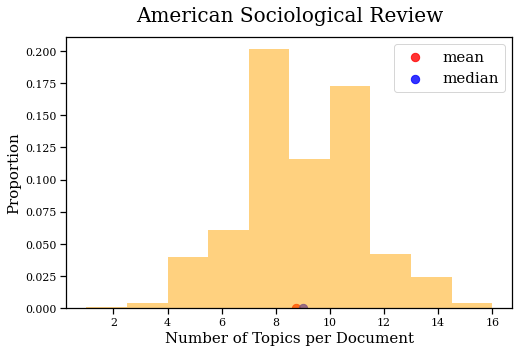

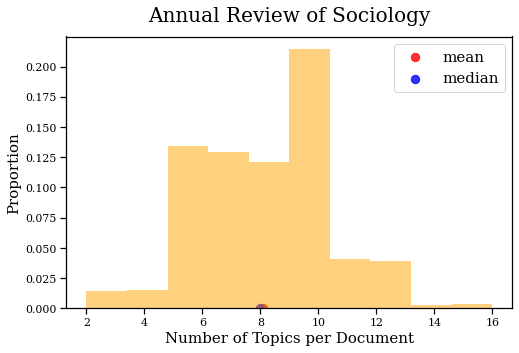

In [43]:
k = 30
LdaOutputDocs.topics_per_doc_summary(theta_mat = socio_theta_dict[k],
                                     bins = 12, 
                                     plot = True, 
                                     custom_title = "All Three Journals")

_ = LdaOutputDocs.topics_per_doc_summary_by_group(theta_mat = socio_theta_dict[k],
                                                    group_list = socio_journals, 
                                                    bins = 10,
                                                    plot = True)

Distribution of $\theta$ values - including or not including those equal to 0

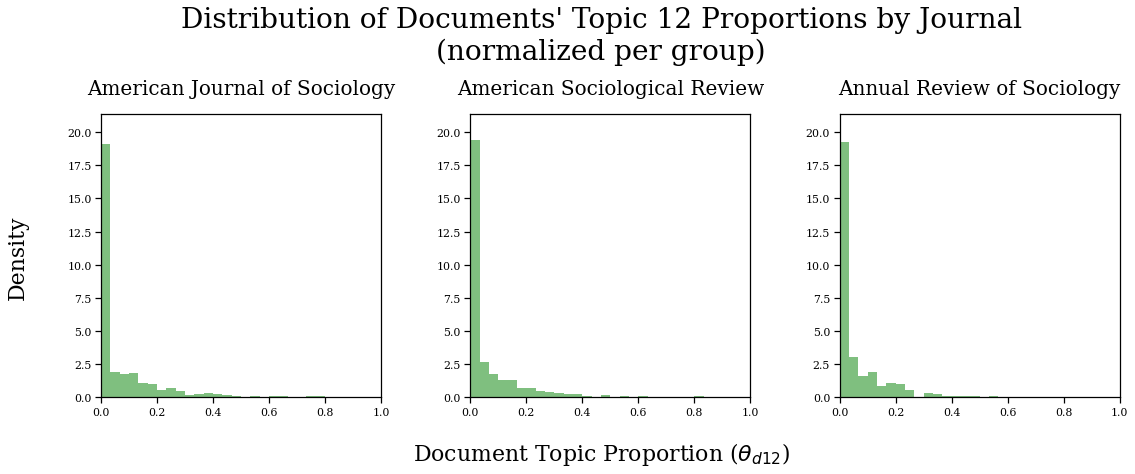

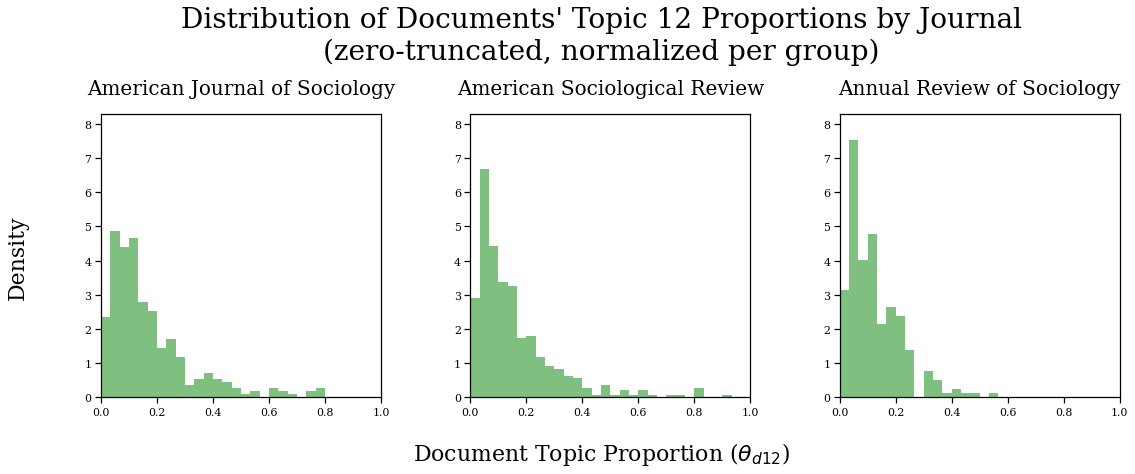

In [44]:
k = 20
LdaOutputDocs.theta_hist_by_group(
                    theta_mat = socio_theta_dict[k],
                    group_list = socio_journals,
                    topic_id = 12,
                    remove_zeros = False,
                    normalize = True, 
                    color = "green",
                    alpha = 0.5,
                    bins = 30,
                    group_name = "Journal",
                    title = None,
                    save_fig = False)

LdaOutputDocs.theta_hist_by_group(
                    theta_mat = socio_theta_dict[k],
                    group_list = socio_journals,
                    topic_id = 12,
                    remove_zeros = True,
                    normalize = True, 
                    color = "green",
                    alpha = 0.5,
                    bins = 30,
                    group_name = "Journal",
                    title = None,
                    save_fig = False)


You can also look at **document trajectories across models**
* this plot ignores soft clustering and affiliates each document with the topic for which it has the largest $\theta_{dk}$
* plot_all = True is not recommended because the plot is usually incomprehensible (too many document trajectories at once). Instead, you can specify "root_k" and "topic_id" arguments. The function will show trajectories for all documents "affiliated" with topic "topic_id" in the  "root_k"-topic model
* there is no requirement that topics in two different models with the same topic ID # are the same topic (label switching can happen) but topics can be traced by looking at how groups of documents move together. In this way, plot can also help identify topic splitting. For example, if a large number of documents affiliated with topic 4 (say) in model $k$ become affiliated with topic 8 in model $k+5$, then perhaps there has been a label switch and topics 4 and 8 are similar. If many documents from 4 go to 8 but another sizable group go to 10, that might suggest splitting. If there are only a few breakaways of documents from topic 4 to other topic IDs, then this could arise from some noisiness, including where theta values slightly shift to change the relative size rankings of a document's component topics.
* **fact that a document changes affiliation does not mean it no longer draws on its old topic**. This is the drawback of ignoring soft clustering.

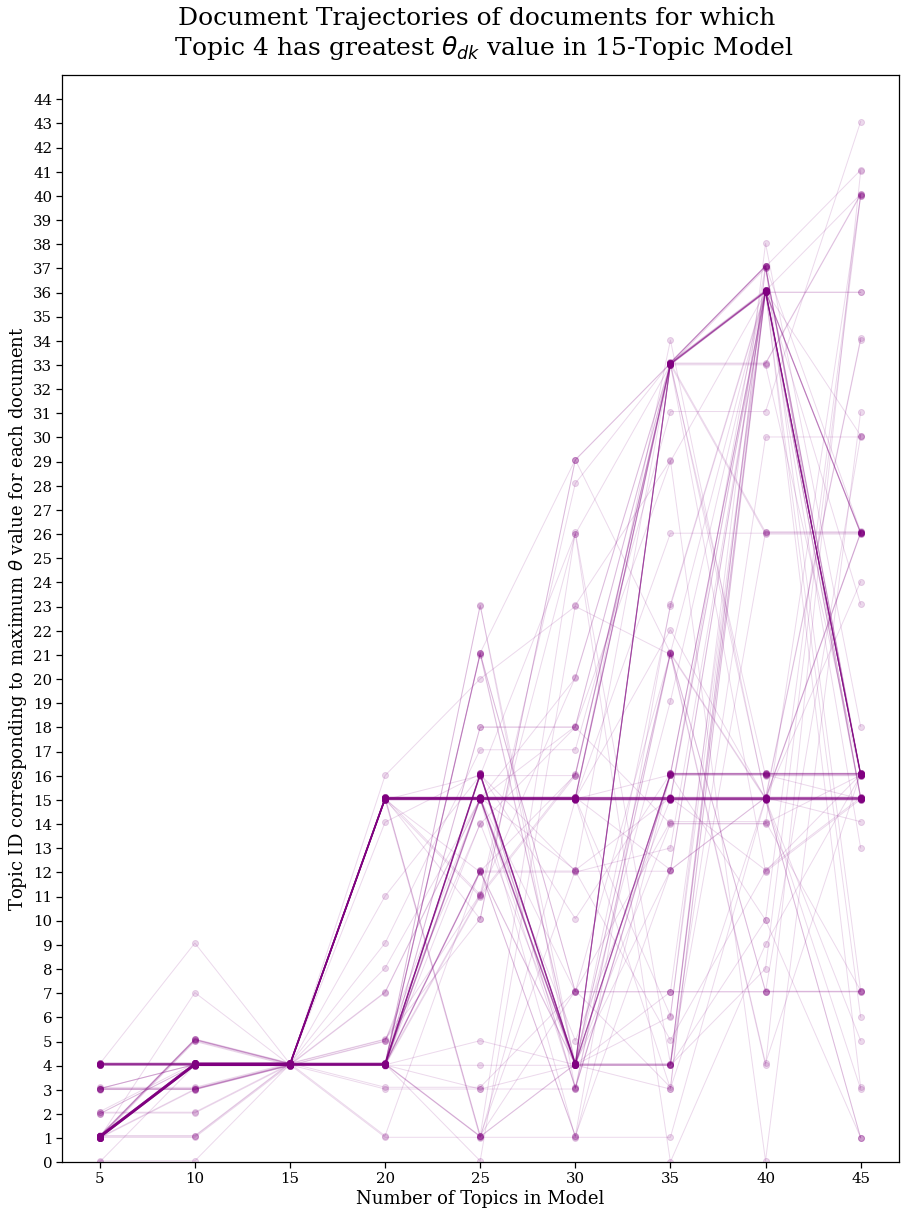

In [45]:
#plot will only show trajectories of documents affiliated with topic <topic_id> in the <root_k>-topic model
root_k = 15
topic_id = 4

#warning, if set this to True, plot is usually incomprehensible because plots all 2000+ documents trajectories at once
plot_all = False

#use these to restrict the range of k-values plotted
min_K = None
max_K = None

LdaOutputDocs.plot_doc_trajectories(theta_dict = socio_theta_dict,
                      root_k = root_k,
                      topic_id = topic_id,
                      plot_all = False,
                      min_K = min_K,
                      max_K = max_K,
                      single_color = "purple",
                      cmap = "tab20", 
                      figsize = (15,20),
                      shift_width = True)             

Viewing actual documents --- overall or by journal

In [46]:
k = 15
output = LdaOutputDocs.get_topic_topdoc_table(demog_TM_data,
                                 demog_theta_dict[k], 
                                 topic_id = 10,
                                 topd = 10, #top 10 documents 
                                 latex = False, 
                                 omit_abstract = True)
output

Year     Journal  \
0  2019  Demography   
1  1971  Demography   
2  2011  Demography   
3  2021  Demography   
4  1986  Demography   
5  1966  Demography   
6  1974  Demography   
7  1977  Demography   
8  2009  Demography   
9  1974  Demography   

                                                                                                            Title  \
0                                                                A Note on the Effect of Religiosity on Fertility   
1                                                                             Urbanization in Thailand, 1947-1967   
2    Is There an Urban Advantage in Child Survival in Sub-Saharan Africa? Evidence From 18 Countries in the 1990s   
3                 Fertility Drain or Fertility Gain? Emigration and Fertility During the Great Recession in Italy   
4                                   The determinants of effective fecundability based on the first birth interval   
5                                                                            A further look at catholic fertility   
6  The impact of urbanization and geographical dispersion on the linguistic russification of soviet nationalities   
7                                                                            Residential preferences andmigration   
8                  What explains the rural-urban gap in infant mortality: Household or community characteristics?   
9             Differential life-styles between migrants and nonmigrants: A case study of the city of Shiraz, Iran   

   Theta  
0   0.70  
1   0.58  
2   0.58  
3   0.57  
4   0.55  
5   0.53  
6   0.52  
7   0.51  
8   0.51  
9   0.49

In [47]:
k = 15
output = LdaOutputDocs.get_topic_topdoc_table(demog_TM_data,
                                 demog_theta_dict[k], 
                                 topic_id = 10,
                                 topd = 10, #top 10 documents 
                                 latex = False, 
                                 omit_abstract = True)
output

Year     Journal  \
0  2019  Demography   
1  1971  Demography   
2  2011  Demography   
3  2021  Demography   
4  1986  Demography   
5  1966  Demography   
6  1974  Demography   
7  1977  Demography   
8  2009  Demography   
9  1974  Demography   

                                                                                                            Title  \
0                                                                A Note on the Effect of Religiosity on Fertility   
1                                                                             Urbanization in Thailand, 1947-1967   
2    Is There an Urban Advantage in Child Survival in Sub-Saharan Africa? Evidence From 18 Countries in the 1990s   
3                 Fertility Drain or Fertility Gain? Emigration and Fertility During the Great Recession in Italy   
4                                   The determinants of effective fecundability based on the first birth interval   
5                                                                            A further look at catholic fertility   
6  The impact of urbanization and geographical dispersion on the linguistic russification of soviet nationalities   
7                                                                            Residential preferences andmigration   
8                  What explains the rural-urban gap in infant mortality: Household or community characteristics?   
9             Differential life-styles between migrants and nonmigrants: A case study of the city of Shiraz, Iran   

   Theta  
0   0.70  
1   0.58  
2   0.58  
3   0.57  
4   0.55  
5   0.53  
6   0.52  
7   0.51  
8   0.51  
9   0.49

In [48]:
k = 15
output = LdaOutputDocs.get_topic_topdoc_by_journal(df = socio_TM_data,
                                              theta_mat = socio_theta_dict[k],
                                              topic_id = 4,
                                              topd = 5, 
                                              latex = False, 
                                              omit_abstract = True)

output[0]

Year                        Journal  \
0  2007  American Journal of Sociology   
1  1999  American Journal of Sociology   
2  2015  American Journal of Sociology   
3  1999  American Journal of Sociology   
4  2016  American Journal of Sociology   

                                                                                                           Title  \
0                                                              Adolescent first sex and subsequent mental health   
1  Family structure, educational attainment, and socioeconomic success: Rethinking the "pathology of matriarchy"   
2                                        Family structure instability, genetic sensitivity, and child well-being   
3                                                                  Family integration and children's self-esteem   
4                                    Neighborhood effect heterogeneity by family income and developmental period   

   Theta  
0   0.69  
1   0.58  
2   0.57  
3   0.55  
4   0.54

In [49]:
output[1]

Year                       Journal  \
0  2005  American Sociological Review   
1  2017  American Sociological Review   
2  1998  American Sociological Review   
3  2016  American Sociological Review   
4  2008  American Sociological Review   

                                                                                                                        Title  \
0                                                                   Interracial relationships and the transition to adulthood   
1  Cut to the Quick: The Consequences of Youth Violent Victimization for the Timing of Dating Debut and First Union Formation   
2                                                     Effects of parental divorce on mental health throughout the life course   
3                     Childhood Disadvantage and Health Problems in Middle and Later Life: Early Imprints on Physical Health?   
4                                                   Stability and change in family structure and maternal health trajectories   

   Theta  
0   0.98  
1   0.85  
2   0.81  
3   0.79  
4   0.75

In [50]:
output[2]

Year                     Journal  \
0  1996  Annual Review of Sociology   
1  2013  Annual Review of Sociology   
2  2010  Annual Review of Sociology   
3  2009  Annual Review of Sociology   
4  2004  Annual Review of Sociology   

                                                             Title  Theta  
0                                 Adult child-parent relationships   0.63  
1   Demographic change and parent-child relationships in adulthood   0.62  
2  Social relationships and health behavior across the life course   0.54  
3                           New directions in life course research   0.47  
4                                               Low-income fathers   0.44

# A Note on Figure Saving Options

The standard figure saving options arguments present in almost all the functions above (ocassionally there are slight variations - see function-specific documentation by typing ? and then    script name.function name) are:

    
* **save_fig** True or False
* **fig_outpath**  optionally specify path where want function to save figure
* **dpi** dpi for saving figure
* **fig_name** file name to use when saving figure
* **fig_override** if True, overrides any existing files with the same name as fig_name. If false, adds #'s to end of proposed name until finds a name that is not yet used
